# SuperPoderosas

Índice:

1. Gestión de datos vacíos e imputación
2. Normalizar variables numéricas
3. Primera prueba
4. Numeración de las variables categóricas
5. Transformación de la etiqueta
6. Partición de datos de entrenamiento
7. Estudio de valores anómalos
8. Estudio y extracción de características
9. Segunda prueba

aaaaaaaaa

10. Estudio de la cantidad de de variables relevantes e hiperparámetros
11. (Posible lasso?) 
11. Tercera prueba
12. Modelo final

aaaaaaaaaaaaaaaaaa

8. Uso de los datos de test y pasarlo a kaggle
8. Reversión de modificaciones
9. Conclusiones del estudio

## 1. Gestión de datos vacíos e imputaciones

Carga de datos:

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
#warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

In [250]:
'''
train_dataset = pd.read_csv('train.csv', header='infer')
test_dataset = pd.read_csv('test.csv', header='infer')

train_dataset.columns
#test_dataset
'''

"\ntrain_dataset = pd.read_csv('train.csv', header='infer')\ntest_dataset = pd.read_csv('test.csv', header='infer')\n\ntrain_dataset.columns\n#test_dataset\n"

In [251]:
# CAMBIADO MARTA

train_dataset = pd.read_csv('train.csv', header='infer',index_col = 0)
test_dataset = pd.read_csv('test.csv', header='infer',index_col = 0)

train_dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [252]:
train_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [253]:
print(train_dataset.shape)
print(test_dataset.shape)

(1460, 80)
(1459, 79)


#### 1.1 Gestión de datos vacíos

In [254]:
#  Busca valores nulos en training.
train_data_null_values = train_dataset.isnull().sum(axis=0)

train_null_val = train_data_null_values[train_data_null_values > 0 ]
#print(train_null_val)

#print("-------------")
#  Busca valores nulos en test.
test_data_null_values = test_dataset.isnull().sum(axis=0)

test_null_val = test_data_null_values[test_data_null_values > 0 ]
#print(test_null_val)

total_null_dataset = train_null_val.fillna(0).add(test_null_val.fillna(0), fill_value=0)
total_null_dataset

# 

Alley           2721.0
BsmtCond          82.0
BsmtExposure      82.0
BsmtFinSF1         1.0
BsmtFinSF2         1.0
BsmtFinType1      79.0
BsmtFinType2      80.0
BsmtFullBath       2.0
BsmtHalfBath       2.0
BsmtQual          81.0
BsmtUnfSF          1.0
Electrical         1.0
Exterior1st        1.0
Exterior2nd        1.0
Fence           2348.0
FireplaceQu     1420.0
Functional         2.0
GarageArea         1.0
GarageCars         1.0
GarageCond       159.0
GarageFinish     159.0
GarageQual       159.0
GarageType       157.0
GarageYrBlt      159.0
KitchenQual        1.0
LotFrontage      486.0
MSZoning           4.0
MasVnrArea        23.0
MasVnrType      1766.0
MiscFeature     2814.0
PoolQC          2909.0
SaleType           1.0
TotalBsmtSF        1.0
Utilities          2.0
dtype: float64

##### Visualización de valores faltantes

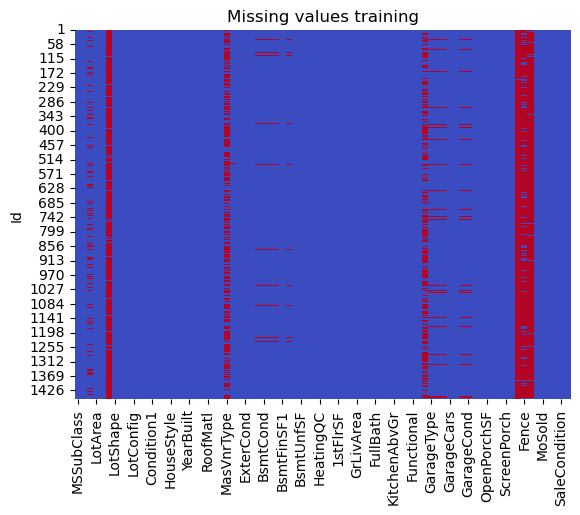

In [255]:
matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

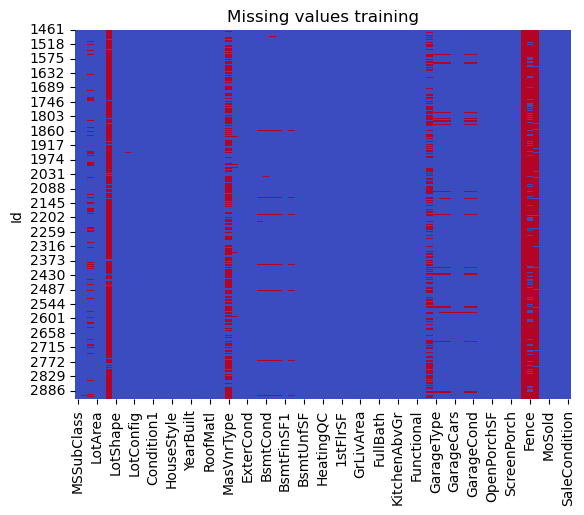

In [256]:
matriz_test_null = test_dataset.isnull()
sns.heatmap(matriz_test_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

Se procede a realizar un estudio de las siguientes variables para determinar qué realizar con los valores faltantes. Para ello se procederá a eliminar todas las filas con una tasa de NaN inferior al 1% (es decir, menos de 29 valores nulos)

https://www.kaggle.com/code/asyaaatru/sale-price-as-detailed-as-possible

Las columnas con 29 o menos NaN son las siguientes. Se procederá a la eliminación completa de la fila correspondiente al valor faltante: 
- BsmtFinSF1         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFinSF2         1.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtFullBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtHalfBath       2.0 - Filas eliminadas (Cantidad menor al umbral)
- BsmtUnfSF          1.0 - Filas eliminadas (Cantidad menor al umbral)
- Electrical         1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior1st        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Exterior2nd        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Functional         2.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageArea         1.0 - Filas eliminadas (Cantidad menor al umbral)
- GarageCars         1.0 - Filas eliminadas (Cantidad menor al umbral)
- KitchenQual        1.0 - Filas eliminadas (Cantidad menor al umbral)
- MSZoning           4.0 - Filas eliminadas (Cantidad menor al umbral)
- MasVnrArea        23.0 - Filas eliminadas (Cantidad menor al umbral)
- SaleType           1.0 - Filas eliminadas (Cantidad menor al umbral)
- TotalBsmtSF        1.0 - Filas eliminadas (Cantidad menor al umbral)
- Utilities          2.0 - Filas eliminadas (Cantidad menor al umbral)

Una vez filtrados, estudiaremos los datos con NaN restantes uno a uno, decidiendo si eliminar o imputar:

- Alley           2721.0 - Considerado como "Cantidad = 0"
- BsmtCond          82.0 - Considerado como "Cantidad = 0"
- BsmtExposure      82.0 - Considerado como "Cantidad = 0"
- BsmtFinType1      79.0 - Considerado como "Cantidad = 0"
- BsmtFinType2      80.0 - Considerado como "Cantidad = 0"
- BsmtQual          81.0 - Considerado como "Cantidad = 0"
- Fence           2348.0 - Considerado como "Cantidad = 0"
- FireplaceQu     1420.0 - Considerado como "Cantidad = 0"
- GarageCond       159.0 - Considerado como "Cantidad = 0"
- GarageFinish     159.0 - Considerado como "Cantidad = 0"
- GarageQual       159.0 - Considerado como "Cantidad = 0"
- GarageType       157.0 - Considerado como "Cantidad = 0"
- GarageYrBlt      159.0 - Considerado como "Cantidad = 0" --> en test hay dos que no tienen sentido
- LotFrontage      486.0 - Valor faltante
- MasVnrType      1766.0 - Considerado como "Cantidad = 0"
- MiscFeature     2814.0 - Considerado como "Cantidad = 0"
- PoolQC          2909.0 - Considerado como "Cantidad = 0"

De las variables con NaN, solo en "LotFrontage" y "MasVnrType" se han considerado que los NaN hacen referencia a datos vacíos. Se procederán a descartar las columnas por las siguientes razones:
 - En "LotFrontage" hay un 16.7% de datos faltantes, por lo que se procedió a analizar su relevancia. Tras un riguroso análisis se consideró poco relevante y se eliminó del modelo final(Fuete: la de los deseos)

#### 1.2 Tratamiento de missing values

- Vamos a cambiar los NaN que hacen referencia a una clase en una variable categórica o a un valor en una numérica.
- Los NaN que son realmente valores faltantes, como son una proporción muy pequeña, vamos a eliminar las filas donde se encuentran (o imputar sus valores).

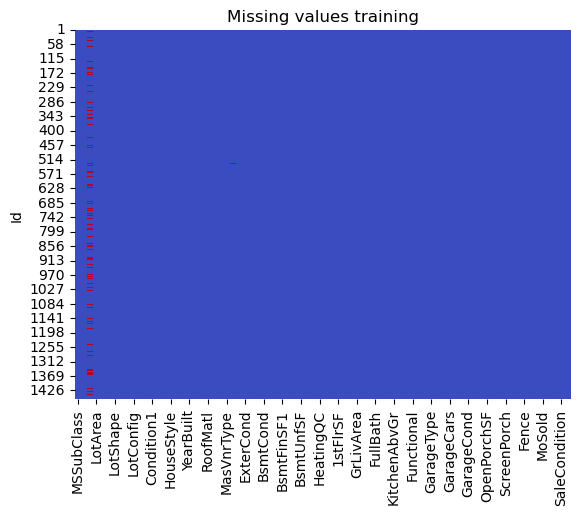

In [257]:
caract_clase_NA = ['Alley','MasVnrType','BsmtQual','GarageYrBlt','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# Cambiamos el valor nan por una clase 'No hay'
for caract in caract_clase_NA:
    train_dataset[caract] = train_dataset[caract].fillna('0')
    test_dataset[caract] = test_dataset[caract].fillna('0')


matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()


In [258]:
# CAMBIOS MARTA

#-----------------ESTO COMO ESTABA-------------------------
# Variables con "True NaN"
caract_nan = ['LotFrontage','MasVnrArea','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']

# Borramos las filas que contienen valores NaN no equivalentes a 0
umbral = 0.01*(train_dataset.shape[0]+test_dataset.shape[0]) # si es el 1% del total de datos se borra la fila

for caract1 in caract_nan:
    if 0<train_data_null_values[caract1] <= umbral:
        train_dataset = train_dataset.dropna(subset=[caract1])

#-----------------HASTA AQUÍ-------------------------




MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64
MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64


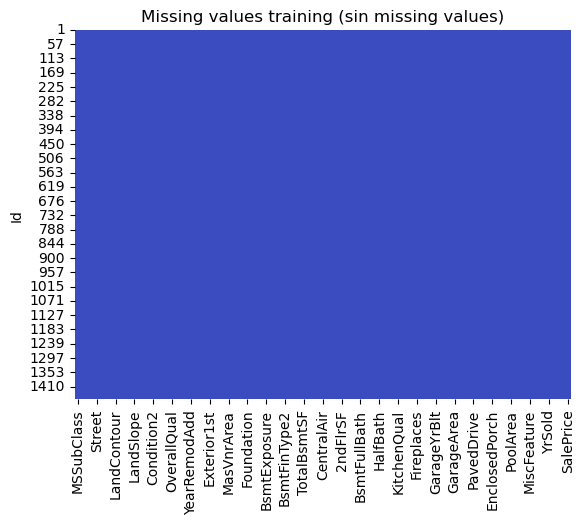

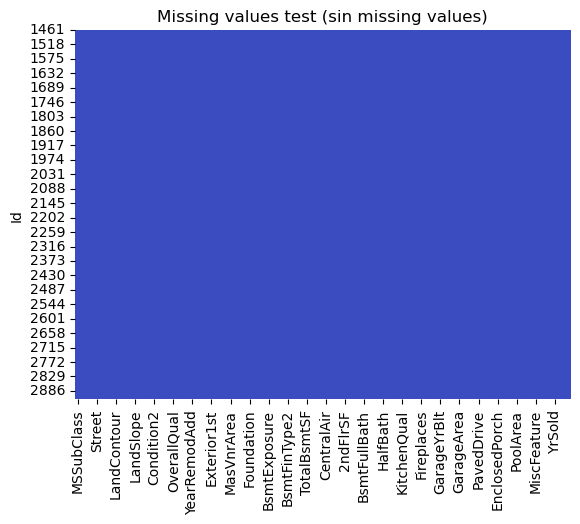

Series([], dtype: int64)
Series([], dtype: int64)


In [259]:
# CAMBIOS MARTA
# Para tratar los datos de test lo que se va a hacer es imputar el valor por la moda en el caso de variables categóricas y 
# por la mediana de los datos de training. De esta forma, no se eliminarán instancias del conjunto de test, para que no haya 
# ningún tipo de posible error al pasarle las predicciones a kaggle

#  Busca valores nulos en test.
test_data_null_values = test_dataset.isnull().sum(axis=0)
test_null_val = test_data_null_values[test_data_null_values > 0 ]
print(test_null_val)

# Se puede observar que todas las variables presentan una cantidad pequeña de valores NaN, exceptuando 'LotFrontage'. Por lo que 
# se van a tratar todos exceptuando esta.

# 1º Eliminamos la característica 'LotFrontage'
for df in [train_dataset, test_dataset]:
    if "LotFrontage" in df.columns:
        df.drop(columns=["LotFrontage"], inplace=True)

# Volvemos a calcular test_null_val para que no esté 'LotFrontage'
test_data_null_values = test_dataset.isnull().sum(axis=0)
test_null_val = test_data_null_values[test_data_null_values > 0 ]
print(test_null_val)

# 2º Calculamos la moda de cada una de las variables categóricas del conjunto de training y la mediana para las variables numéricas
# Lista con nombres de variables numéricas
nombre_variables_num_test=[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
# para cada una de las variables con valores NaN
for caract_con_nan in test_null_val.index:
    if caract_con_nan in nombre_variables_num_test: # si la variable es numérica
        median_value = train_dataset[caract_con_nan].median() # calculo mediana de esa variable del conjunto de training
        test_dataset[caract_con_nan] = test_dataset[caract_con_nan].fillna(median_value) # cambio los nan de test por la mediana de training
    else: # si la variable no es numérica (es cattegórica)
        mode_value = train_dataset[caract_con_nan].mode()[0] # obtención de la moda de esa variable del conj de training
        test_dataset[caract_con_nan] = test_dataset[caract_con_nan].fillna(mode_value) # cambio los NaN de test por la moda de training


# Visualización de los valores faltantes en los datos de training limpia
matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training (sin missing values)")
plt.show()

# Visualización de los valores faltantes en los datos de training limpia
matriz_test_null = test_dataset.isnull()
sns.heatmap(matriz_test_null, cbar=False, cmap='coolwarm')
plt.title("Missing values test (sin missing values)")
plt.show()

# Comprobación que en training y test no haya datos faltantes
print(train_dataset.isnull().sum(axis=0)[train_dataset.isnull().sum(axis=0) > 0])
print(test_dataset.isnull().sum(axis=0)[test_dataset.isnull().sum(axis=0) > 0])

In [260]:
# CAMBIOS MARTA
# Se puede ver que se han reemplazado los valores en el conjunto de test y se han eliminado las instancias en el de training
# Además, se ha eliminado la columna 'LotFrontage' para evitar introducir demasiada información poco realista en los datos
print(train_dataset.shape)
print(test_dataset.shape)

(1451, 79)
(1459, 78)


In [261]:
# CAMBIOS MARTA
test_dataset.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,11622,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1462,20,RL,14267,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
1463,60,RL,13830,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
1464,60,RL,9978,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,5005,Pave,0,IR1,HLS,AllPub,Inside,Gtl,...,144,0,0,0,0,0,1,2010,WD,Normal


In [262]:
'''
# Variables con "True NaN"
caract_nan = ['LotFrontage','MasVnrArea','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']

# Borramos las filas que contienen valores NaN no equivalentes a 0
umbral = 0.01*(train_dataset.shape[0]+test_dataset.shape[0]) # si es el 1% del total de datos se borra la fila

for caract1 in caract_nan:
    if 0<train_data_null_values[caract1] <= umbral:
        train_dataset = train_dataset.dropna(subset=[caract1])
    if 0<test_data_null_values[caract1] <= umbral:
        test_dataset = test_dataset.dropna(subset=[caract1]) # borrar fila si la columna caract1 tiene NaN

# FALTA ELIMINAR COLUMNAS Y/O IMPUTAR      


for df in [train_dataset, test_dataset]:
    if "LotFrontage" in df.columns:
        df.drop(columns=["LotFrontage"], inplace=True)

matriz_train_null = train_dataset.isnull()
sns.heatmap(matriz_train_null, cbar=False, cmap='coolwarm')
plt.title("Missing values training")
plt.show()

train_dataset.isnull().sum(axis=0)[train_dataset.isnull().sum(axis=0) > 0]
'''

'\n# Variables con "True NaN"\ncaract_nan = [\'LotFrontage\',\'MasVnrArea\',\'Electrical\',\'MSZoning\',\'Utilities\',\'Exterior1st\',\'Exterior2nd\',\'BsmtFinSF1\',\'BsmtFinSF2\',\'BsmtUnfSF\',\'TotalBsmtSF\',\'BsmtFullBath\',\'BsmtHalfBath\',\'KitchenQual\',\'Functional\',\'GarageCars\',\'GarageArea\',\'SaleType\']\n\n# Borramos las filas que contienen valores NaN no equivalentes a 0\numbral = 0.01*(train_dataset.shape[0]+test_dataset.shape[0]) # si es el 1% del total de datos se borra la fila\n\nfor caract1 in caract_nan:\n    if 0<train_data_null_values[caract1] <= umbral:\n        train_dataset = train_dataset.dropna(subset=[caract1])\n    if 0<test_data_null_values[caract1] <= umbral:\n        test_dataset = test_dataset.dropna(subset=[caract1]) # borrar fila si la columna caract1 tiene NaN\n\n# FALTA ELIMINAR COLUMNAS Y/O IMPUTAR      \n\n\nfor df in [train_dataset, test_dataset]:\n    if "LotFrontage" in df.columns:\n        df.drop(columns=["LotFrontage"], inplace=True)\n\nmat

## 2. Normalización de datos numéricos

Obtención de datos numéricos

In [263]:
numerical_values=train_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]
#"BsmtFinSF1"
#"BsmtFinSF2"
#"BsmtUnfSF"
# Lista de características de propiedades con comentarios explicativos

numerical_values_test=test_dataset[[
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea" , "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]]

Normalización

In [264]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

# Lo dice Samnsung
X_train_robust = rbs.fit_transform(numerical_values)
X_test_robust = rbs.fit_transform(numerical_values_test)

X_test_robust

array([[-6.00000000e-01,  5.38713195e-01, -5.00000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.00000000e-01,  1.17969223e+00,  0.00000000e+00, ...,
         1.25000000e+04,  0.00000000e+00,  1.00000000e+00],
       [ 2.00000000e-01,  1.07379135e+00, -5.00000000e-01, ...,
         0.00000000e+00, -7.50000000e-01,  1.00000000e+00],
       ...,
       [-6.00000000e-01,  2.56900521e+00, -5.00000000e-01, ...,
         0.00000000e+00,  7.50000000e-01, -1.00000000e+00],
       [ 7.00000000e-01,  2.52514237e-01, -5.00000000e-01, ...,
         7.00000000e+02,  2.50000000e-01, -1.00000000e+00],
       [ 2.00000000e-01,  5.52526354e-02,  5.00000000e-01, ...,
         0.00000000e+00,  1.25000000e+00, -1.00000000e+00]])

## 3 Primera versión
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest


In [265]:
# Regresion lineal con variables numéricas:

lr = LinearRegression()

lr.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = lr.predict(X_train_robust)

print(predY.size)

a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas

features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, lr.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys



1451
34083.44853690971


['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'KitchenAbvGr',
 'GarageCars',
 'BsmtFullBath',
 '2ndFlrSF',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'MSSubClass',
 '1stFlrSF',
 'TotalBsmtSF',
 'OverallCond',
 'MasVnrArea',
 'Fireplaces',
 'BsmtHalfBath',
 'WoodDeckSF',
 'YearRemodAdd',
 'FullBath',
 'HalfBath',
 'GarageArea',
 'LotArea',
 'YrSold',
 'OpenPorchSF',
 'GarageYrBlt',
 'MoSold',
 'ScreenPorch',
 'PoolArea',
 '3SsnPorch',
 'LowQualFinSF',
 'EnclosedPorch',
 'MiscVal']

In [266]:
# Random forest con variables numéricas:

RFR = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFR.fit(X_train_robust, train_dataset[["SalePrice"]])
predY = RFR.predict(X_train_robust)


a= metrics.mean_squared_error(train_dataset[["SalePrice"]], predY)
print(np.sqrt(a))


# Mostrar features ordenadas
features = [
    "MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

coef_dict = dict(zip(features, RFR.feature_importances_))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
sorted_keys


c:\Users\marta\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


25544.889385338698


['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'LotArea',
 'TotRmsAbvGrd',
 'FullBath',
 'YearBuilt',
 'GarageYrBlt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'WoodDeckSF',
 'BsmtFullBath',
 'OpenPorchSF',
 'KitchenAbvGr',
 'OverallCond',
 'BedroomAbvGr',
 'MoSold',
 'MSSubClass',
 'HalfBath',
 'ScreenPorch',
 'YrSold',
 '3SsnPorch',
 'EnclosedPorch',
 'LowQualFinSF',
 'BsmtHalfBath',
 'PoolArea',
 'MiscVal']

## 4. Numeración de las característas categóricas


#### 4.1 Aplicación de OneHotEncoding

In [267]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# MSSubClass es NUMERICA
caract_categoricas_nominales = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']
categoricasdf_train = pd.DataFrame()
categoricasdf_test = pd.DataFrame()
for carac in caract_categoricas_nominales:
    print(carac)
    print(train_dataset[[carac]])
    train_target = pd.DataFrame(train_dataset[carac], columns = [carac])
    train_target.head(20)
    test_target = pd.DataFrame(test_dataset[carac], columns = [carac])

    one_hot_encoder =OneHotEncoder(sparse_output=False)
    #ohe_reshaper = one_hot_encoder.fit_transform(train_target)
    one_hot_encoder.fit(train_target)
    ohe_array_train = one_hot_encoder.transform(train_target)
    ohe_array_test = one_hot_encoder.transform(test_target)
    feature_names = one_hot_encoder.get_feature_names_out(train_target.columns)
    print('_____')
    print(feature_names)
    print(ohe_array_train)
    ohe_df = pd.DataFrame(ohe_array_train, columns= feature_names)
    categoricasdf_train = pd.concat([categoricasdf_train,ohe_df],axis=1,join='outer')

    ohe_df_test = pd.DataFrame(ohe_array_test, columns= feature_names)
    categoricasdf_test = pd.concat([categoricasdf_test,ohe_df_test],axis=1,join='outer')


#print(feature_names)  
#categoricasdf.head(20)
categoricasdf_train.shape

MSZoning
     MSZoning
Id           
1          RL
2          RL
3          RL
4          RL
5          RL
...       ...
1456       RL
1457       RL
1458       RL
1459       RL
1460       RL

[1451 rows x 1 columns]
_____
['MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM']
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
Street
     Street
Id         
1      Pave
2      Pave
3      Pave
4      Pave
5      Pave
...     ...
1456   Pave
1457   Pave
1458   Pave
1459   Pave
1460   Pave

[1451 rows x 1 columns]
_____
['Street_Grvl' 'Street_Pave']
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Alley
     Alley
Id        
1        0
2        0
3        0
4        0
5        0
...    ...
1456     0
1457     0
1458     0
1459     0
1460     0

[1451 rows x 1 columns]
_____
['Alley_0' 'Alley_Grvl' 'Alley_Pave']
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
LandCo

(1451, 164)

Unimos los dataframes de variables numericas normalizadas con el de las variables categoricas nominales con oneHotEncoding

In [268]:
X_train_robust_df = pd.DataFrame(X_train_robust, columns=features)
#X_train_robust_df
df_joined_train = pd.concat([categoricasdf_train,X_train_robust_df],axis=1,join='outer') 
df_joined_train.shape

X_test_robust_df = pd.DataFrame(X_test_robust, columns=features)
#X_test_robust_df
df_joined_test = pd.concat([categoricasdf_test,X_test_robust_df],axis=1,join='outer') 
df_joined_test.shape

(1459, 196)

#### 4.2 Numerización de las variables categóricas ordinales:

In [269]:
caract_categoricas_ordinales = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

# Definición del diccionario con las transformaciones
diccionario_ordinales = {'LotShape_dic' : {'Reg':1,'IR1':2,'IR2':3,'IR3':4}, 
                        'Utilities_dic' : {'ELO':1,'NoSeWa':2,'NoSeWr':3,'AllPub':4},
                        'LandSlope_dic' : {'Gtl':1,'Mod':2,'Sev':3},
                        'ExterQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'ExterCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'BsmtQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0}, # no sé si hay que poner un 0 o empezar siempre en el 1
                        'BsmtCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'BsmtExposure_dic' : {'Gd':4,'Av':3,'Mn':2,'No':1,'0':0},
                        'BsmtFinType1_dic' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0},
                        'BsmtFinType2_dic' : {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'0':0},
                        'HeatingQC_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'Electrical_dic' : {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
                        'KitchenQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                        'Functional_dic' : {'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8},
                        'FireplaceQu_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'GarageFinish_dic' : {'Fin':3,'RFn':2,'Unf':1,'0':0},
                        'GarageQual_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'GarageCond_dic' : {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'0':0},
                        'PavedDrive_dic' : {'Y':3,'P':2,'N':1},
                        'PoolQC_dic' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'0':0},
                        'Fence_dic' : {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'0':0}}

df_vars_ord_limp_train = pd.DataFrame()
df_vars_ord_limp_test= pd.DataFrame()

# Transformaciones
for caract in caract_categoricas_ordinales:
    df_vars_ord_limp_train[caract] = train_dataset[caract].map(diccionario_ordinales[caract+'_dic'])
    df_vars_ord_limp_test[caract] = test_dataset[caract].map(diccionario_ordinales[caract+'_dic'])

df_vars_ord_limp_train

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,1,4,1,4,3,4,3,1,6,1,...,5,4,1,0,2,3,3,3,0,0
2,1,4,1,3,3,4,3,4,5,1,...,5,3,1,3,2,3,3,3,0,0
3,2,4,1,4,3,4,3,2,6,1,...,5,4,1,3,2,3,3,3,0,0
4,2,4,1,3,3,3,4,1,5,1,...,5,4,1,4,1,3,3,3,0,0
5,2,4,1,4,3,4,3,3,6,1,...,5,4,1,3,2,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1,4,1,3,3,4,3,1,1,1,...,5,3,1,3,2,3,3,3,0,0
1457,1,4,1,3,3,4,3,1,5,3,...,5,3,2,3,1,3,3,3,0,3
1458,1,4,1,5,4,3,4,1,6,1,...,5,4,1,4,2,3,3,3,0,4


In [270]:
#Comprobar que se ha realizado correctamente la transformación previa
test_dataset.isnull().sum(axis=0)[test_dataset.isnull().sum(axis=0) > 0]

Series([], dtype: int64)

Se procede a unir el dataset con la numerización de las variables con el que tiene todos los cambios previos:

In [271]:
print("Train pre concat: ", df_joined_train.shape)

#OJO: Estamos reseteando los indices debido a diferencias con lso indices tras eliinar filas
df_joined_train = pd.concat([df_joined_train.reset_index(drop=True),
                             df_vars_ord_limp_train.reset_index(drop=True)]
                             ,axis=1,join='outer') 
print("Train post concat: ", df_joined_train.shape)

print("Test pre concat: ", df_joined_test.shape)
df_joined_test = pd.concat([df_joined_test.reset_index(drop=True),
                            df_vars_ord_limp_test.reset_index(drop=True)],
                            axis=1,join='outer') 
print("Test post concat: ", df_joined_test.shape)


Train pre concat:  (1451, 196)
Train post concat:  (1451, 217)
Test pre concat:  (1459, 196)
Test post concat:  (1459, 217)


## 5. Transformación de la etiqueta

Se procede a mostrar la variable "SalePrice" para ver su distribución

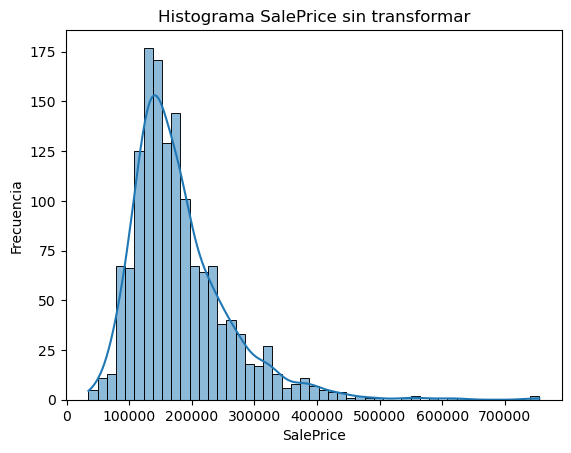

In [272]:
# Visualización del histograma de la etiqueta
plt.figure()
sns.histplot(train_dataset['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.title('Histograma SalePrice sin transformar')
plt.show()

Puesto que sigue una distribución asimétrica a la derecha, se procederá a aplicar una trasformación logarítmica para normalizar así los datos

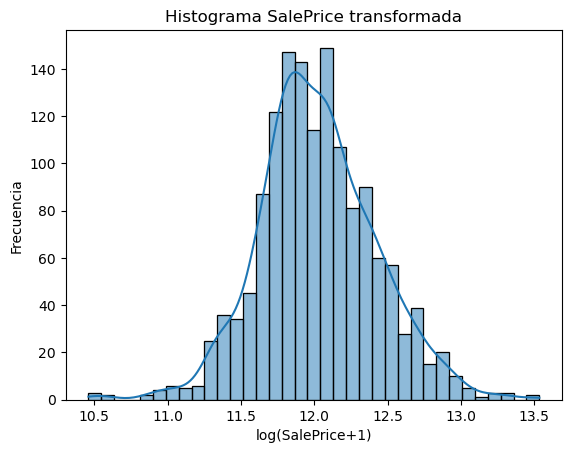

In [273]:
# Transformación logarítmica de la etiqueta

# Se le añade +1 al logaritmo para evitar que sea log(0)
log_prices = np.log1p(train_dataset['SalePrice'])

# Visualización del histograma de la etiqueta
plt.figure()
sns.histplot(log_prices, kde=True)
plt.xlabel('log(SalePrice+1)')
plt.ylabel('Frecuencia')
plt.title('Histograma SalePrice transformada')
plt.show()

## 6. Partición de datos de entrenamiento

Se procederá a separar los datos de entrenamiento en X_train y Y_train para ajustar hiperparámetros (por ejemplo, en regresiones o árboles), evaluar si tu modelo generaliza bien antes del test final, evitar sobreajuste (overfitting)

In [274]:
from sklearn.model_selection import train_test_split

# Separa log prices en bines
# Se ha sustituido digitize por qcut porque genera bins con similar número de observaciones, 
# facilitando la estratificación y evitando bins demasiado pequeños
y_binned = pd.qcut(log_prices, q=10, duplicates='drop') 

# Dividir estratificando por los bins
X_train, X_val, y_train, y_val = train_test_split(
    df_joined_train, log_prices, 
    test_size=0.2, # separamos los datos en 80% training y 20% validation 
    random_state=42, 
    stratify=y_binned  # estratifica según los intervalos
)

print(X_train.shape, X_val.shape)
X_train.head(10)


(1160, 217) (291, 217)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
1262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4,3,1,0,1,3,3,3,0,2
625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,4,2,3,3,3,0,0
37,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,3,3,3,3,3,0,0
1160,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,0,2,3,3,3,0,0
121,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,3,1,0,1,3,3,2,0,3
705,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,4,3,3,3,3,0,0
1304,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,5,2,4,4,3,0,0
92,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5,3,1,0,1,3,3,3,0,0
114,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,3,1,3,3,3,0,3
906,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,5,4,1,4,3,3,3,3,0,0


Además de separar los datos normalizados, se va a separar los datos sin normalizar después de haber tratado los valores NaN. Esto nos permitirá estudiar y visualizar las características de forma mas clara en el futuro

In [275]:
from sklearn.model_selection import train_test_split

# Separa log prices en bines
# Se ha sustituido digitize por qcut porque genera bins con similar número de observaciones, 
# facilitando la estratificación y evitando bins demasiado pequeños
y_binned_og = pd.qcut(train_dataset['SalePrice'], q=10, duplicates='drop') 

# quitamos la columna de PriceSale del train_dataset
X_train_og_sin_Y = train_dataset.drop(columns='SalePrice')

# Dividir estratificando por los bins
X_train_og, X_val_og, y_train_og, y_val_og = train_test_split(
    X_train_og_sin_Y, train_dataset['SalePrice'], 
    test_size=0.2, # separamos los datos en 80% training y 20% validation 
    random_state=42, 
    stratify=y_binned_og  # estratifica según los intervalos
)

print(X_train_og.shape, X_val_og.shape)


(1160, 78) (291, 78)


In [276]:
# CAMBIOS MARTA
# Observamos los estadísticos descriptivos para cada nuevo cojunto de datos en las variables numéricas continuas,
# para comprobar que se mantienen las estadísticas aproximadamente en los dos conjuntos

# Nombre de las vraiables numéricas continuas
vars_cont = ['LotArea',  'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',  'GarageYrBlt',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# Para los datos de training 
X_train_og[vars_cont].describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,10548.743966,1971.106034,1984.718966,101.327586,440.948276,44.176724,565.782759,1050.907759,1162.886207,344.261207,6.029310,1513.176724,471.133621,95.499138,46.637069,21.286207,2.624138,14.860345,2.562069,46.046552
std,9886.789147,30.120866,20.598349,179.534778,434.898301,160.201466,443.800375,413.614369,369.342474,435.863292,49.398985,513.019082,209.590138,126.993549,67.004798,60.167189,26.953450,54.880586,39.370188,541.995471
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7559.500000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,794.750000,887.500000,0.000000,0.000000,1130.750000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9515.000000,1972.000000,1993.000000,0.000000,385.000000,0.000000,474.000000,991.000000,1092.000000,0.000000,0.000000,1461.500000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11755.000000,2000.250000,2004.000000,160.000000,719.000000,0.000000,811.250000,1298.250000,1396.000000,728.000000,0.000000,1774.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3200.000000,3228.000000,2065.000000,572.000000,4676.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [277]:
# CAMBIOS MARTA
# Para los datos de validation 
X_val_og[vars_cont].describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,10344.628866,1971.037801,1984.924399,113.439863,447.563574,57.446735,572.835052,1077.845361,1156.230241,356.632302,5.288660,1518.151203,478.072165,90.082474,45.567010,24.608247,6.646048,16.326460,3.628866,34.639175
std,10421.525671,30.517524,20.896158,187.252031,529.978157,167.775773,436.519218,523.971801,442.621904,439.411423,46.262957,574.855686,231.837112,119.141296,62.255188,64.763744,37.515539,59.958261,43.878512,253.263098
min,1477.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7469.000000,1950.000000,1967.000000,0.000000,0.000000,0.000000,248.000000,796.000000,867.500000,0.000000,0.000000,1114.500000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9297.000000,1976.000000,1994.000000,0.000000,365.000000,0.000000,485.000000,990.000000,1055.000000,0.000000,0.000000,1466.000000,474.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11144.500000,2000.000000,2003.000000,181.000000,665.000000,0.000000,775.000000,1285.000000,1359.000000,729.000000,0.000000,1783.500000,593.000000,160.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,159000.000000,2009.000000,2010.000000,1378.000000,5644.000000,1029.000000,1935.000000,6110.000000,4692.000000,1818.000000,479.000000,5642.000000,1418.000000,576.000000,319.000000,318.000000,320.000000,385.000000,576.000000,3500.000000


## 7. Estudio y extracción de características

#### 7.1 Extracción de características

Creación de nuevas caracteríticas a partir de la combinación lineal de las existentes

In [278]:
# Total metros cuadrados
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_val['TotalSF'] = X_val['TotalBsmtSF'] + X_val['1stFlrSF'] + X_val['2ndFlrSF']

# Total baños
X_train['TotalBath'] = X_train['FullBath'] + 0.5*X_train['HalfBath'] + X_train['BsmtFullBath'] + 0.5*X_train['BsmtHalfBath']
X_val['TotalBath'] = X_val['FullBath'] + 0.5*X_val['HalfBath'] + X_val['BsmtFullBath'] + 0.5*X_val['BsmtHalfBath']

# Años casa
X_train['HouseAge'] = X_train['YrSold'] - X_train['YearBuilt']
X_val['HouseAge'] = X_val['YrSold'] - X_val['YearBuilt']

# Año desde remodelación
X_train['YearSinceRemod'] = X_train['YrSold'] - X_train['YearRemodAdd']
X_val['YearSinceRemod'] = X_val['YrSold'] - X_val['YearRemodAdd']

# Condición de la casa por los m^2
X_train['OverallCond_TotalSF'] = X_train['OverallCond'] * X_train['TotalSF']
X_val['OverallCond_TotalSF'] = X_val['OverallCond'] * X_val['TotalSF']

# Calidad de la casa por los m^2
X_train['OverallQual_TotalSF'] = X_train['OverallQual'] * X_train['TotalSF']
X_val['OverallQual_TotalSF'] = X_val['OverallQual'] * X_val['TotalSF']


X_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,...,GarageCond,PavedDrive,PoolQC,Fence,TotalSF,TotalBath,HouseAge,YearSinceRemod,OverallCond_TotalSF,OverallQual_TotalSF
1262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,2,0.243518,-0.5,-0.195652,0.421053,0.000000,-0.121759
625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,1.181010,0.0,1.369565,1.552632,1.181010,0.000000
37,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,1.023494,-0.5,0.891304,0.578947,1.023494,-0.511747
1160,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3,3,0,0,2.593504,0.0,0.217391,0.605263,0.000000,2.593504
121,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,2,0,3,-0.650176,-1.0,0.217391,0.631579,-0.000000,0.650176


2. Se podría hacer un PCA (si da tiempo, pero a priori no lo haría, y que también disminuye la explicabilidad)

#### 7.2 Selección de características

##### 7.2.1 Comparcación de las distintas características con la etiqueta

- **Característica numérica vs etiqueta numérica**

**Cálculo de la correlación de Pearson** entre cada característica con respecto a la etiqueta. De esta manera, las que estén más correlacionadas en valor absoluto, podrán predecir la etiqueta mejor.

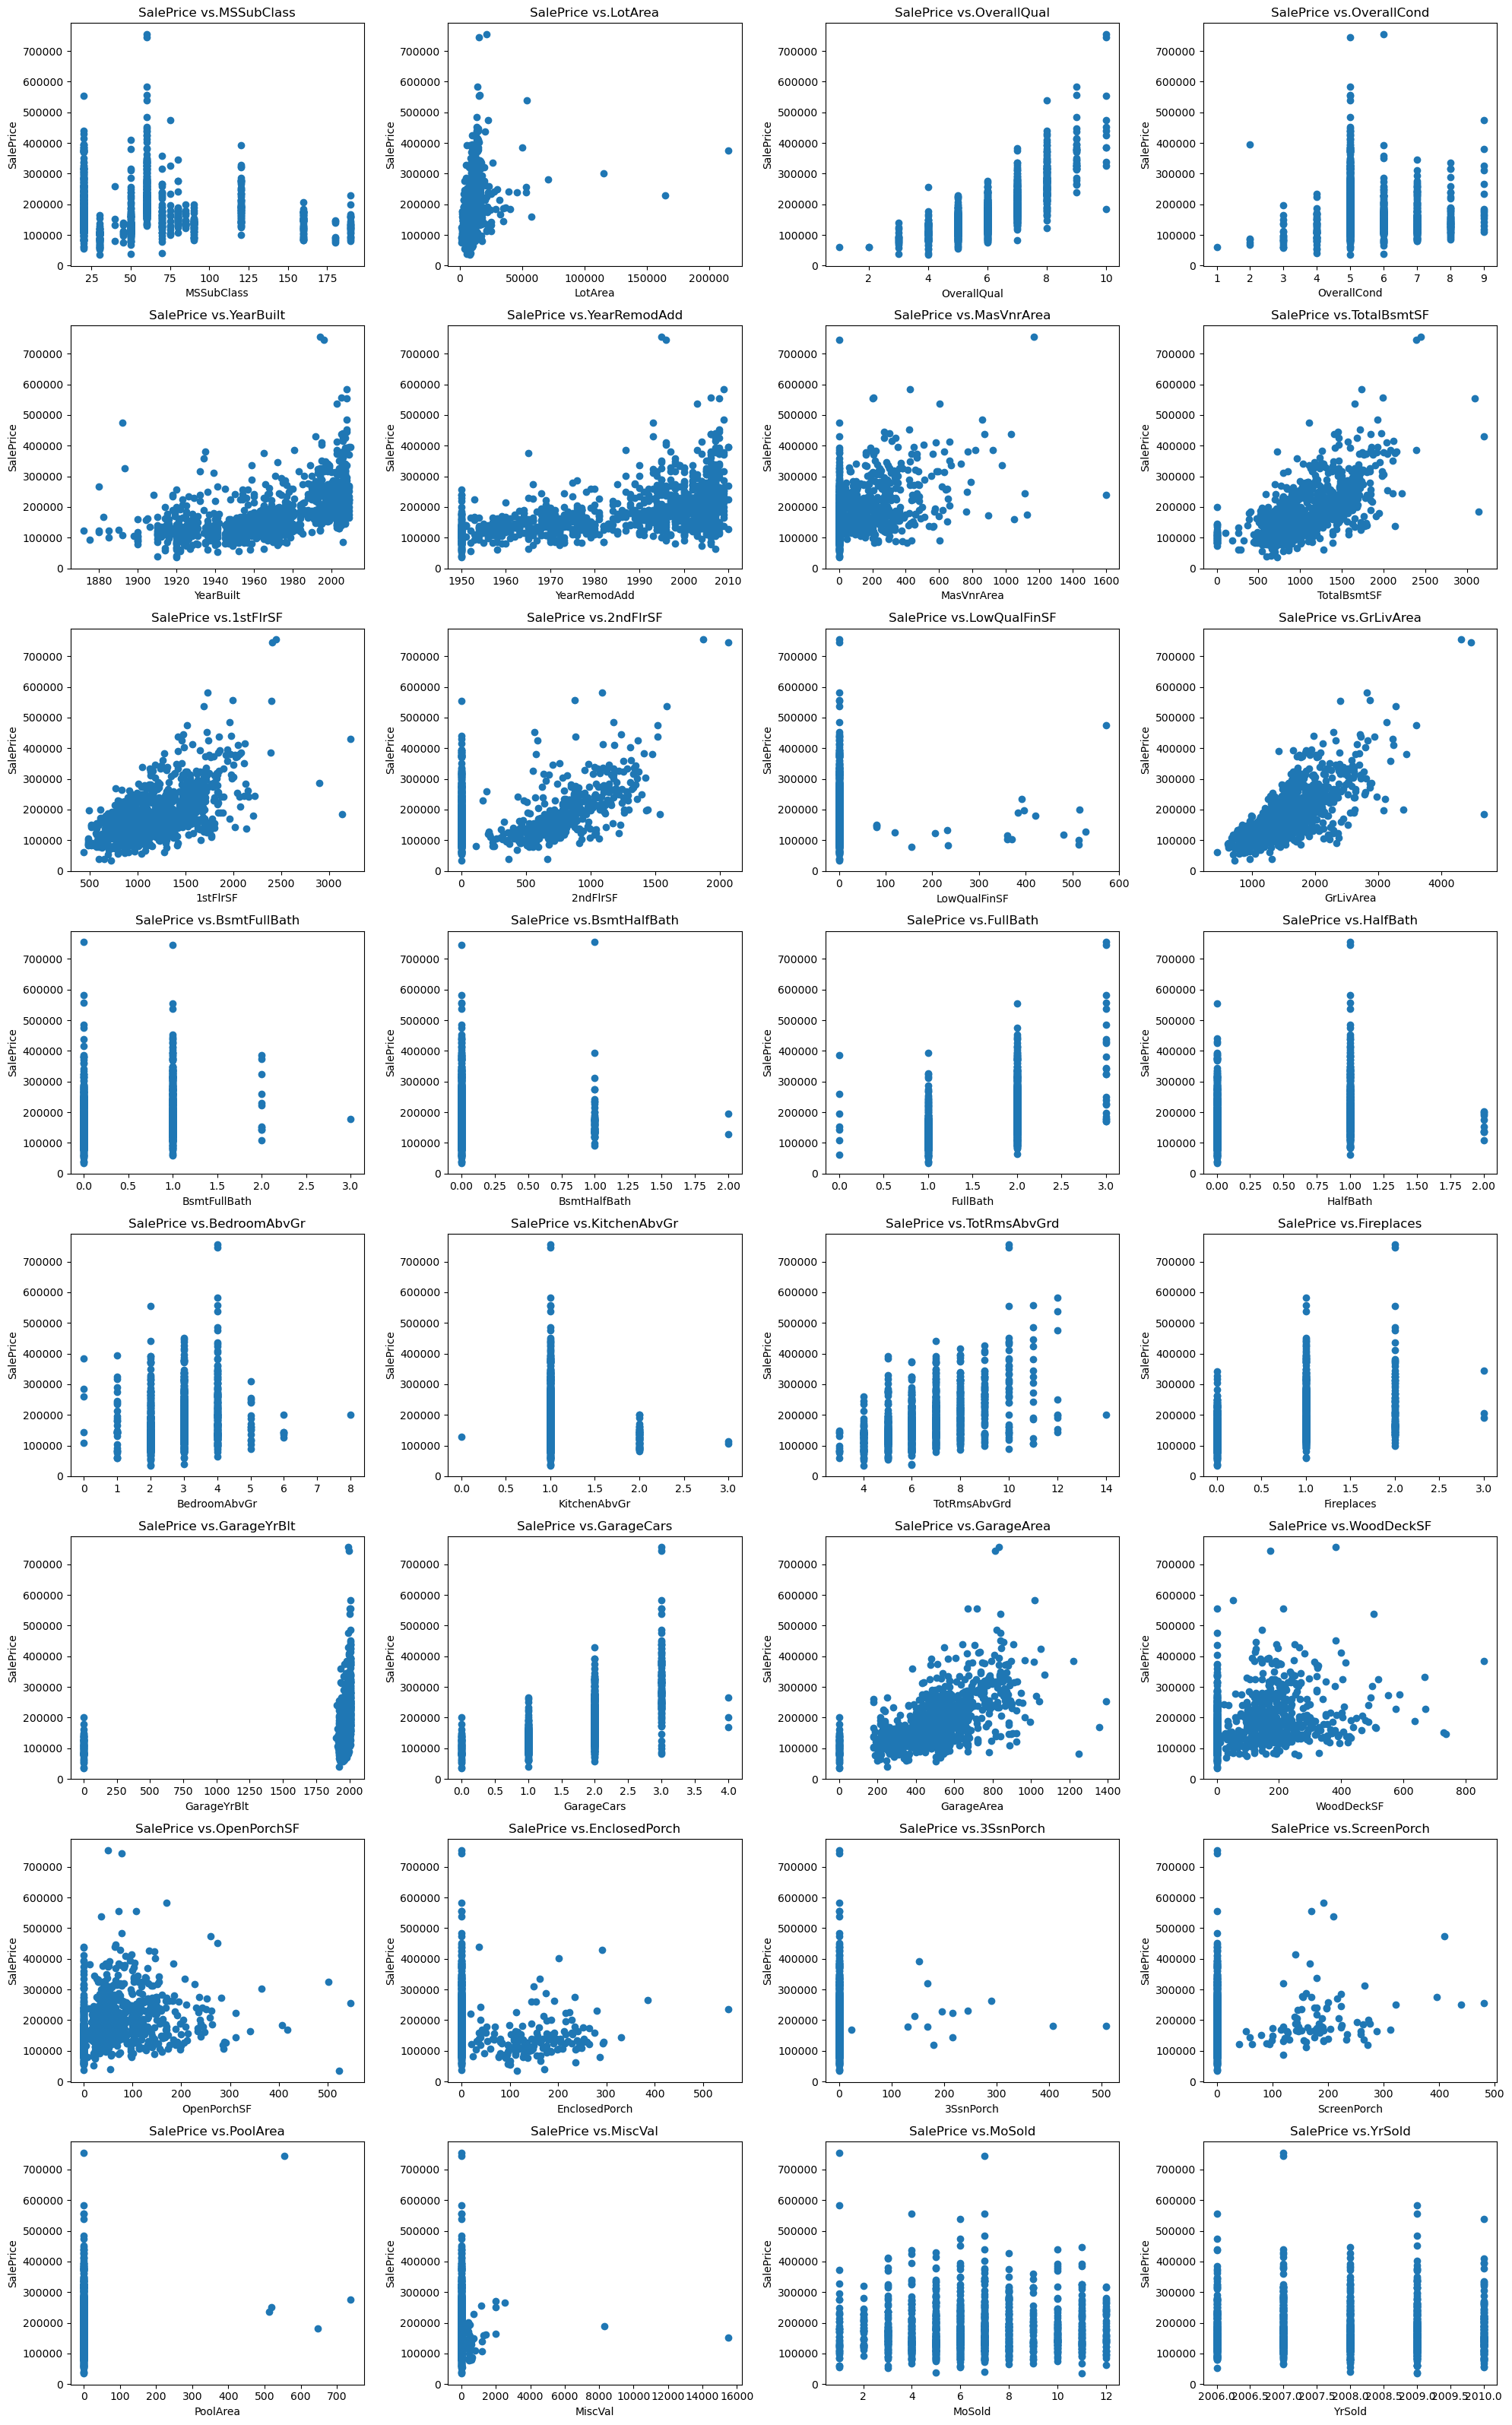

In [ ]:
# CORRELACIÓN DE PEARSON

#####################################
## USAMOS LAS VARIABLES ORIGINALES ##
#####################################

k = 0
corr_var_price = {}
plt.figure(figsize=(5*4, 4*8))

# features son las características numéricas
for caract_num in features:
    k += 1
    # Cálculo de correlación
    corr_with_price = y_train_og.corr(X_train_og[caract_num])
    corr_var_price[caract_num] = corr_with_price
    
    # Visualización
    plt.subplot(8, 4, k)
    plt.scatter(X_train_og[caract_num],y_train_og)
    plt.xlabel(str(caract_num))
    plt.ylabel('SalePrice')
    plt.title('SalePrice vs.'+str(caract_num))

plt.tight_layout()
plt.show()

#print(corr_var_price) # esto es un diccionario con cada una de las variables y su correlación con la etiqueta

In [296]:
# CAMBIOS MARTA
# Ordenamos el diccionario por correlación (de mayor a menor)
corr_var_price_sorted = dict(sorted(corr_var_price.items(), key=lambda item: abs(item[1]), reverse=True)) 
# pasar a valor absoluto el valor de corr de cada una de las características 

# Mostrar las 10 variables más correlacionadas con SalePrice
print("Top 10 variables más correlacionadas con SalePrice:")
for var, corr in list(corr_var_price_sorted.items())[:10]:
    print(f"{var}: {corr:.3f}")

corr_50_vars = list(corr_var_price_sorted.keys())[:50]
corr_50_vars


Top 10 variables más correlacionadas con SalePrice:
OverallQual: 0.789
GrLivArea: 0.729
GarageCars: 0.634
TotalBsmtSF: 0.632
1stFlrSF: 0.612
GarageArea: 0.610
FullBath: 0.558
TotRmsAbvGrd: 0.526
YearBuilt: 0.519
YearRemodAdd: 0.514


['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageArea',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'MasVnrArea',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'GarageYrBlt',
 'BsmtFullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 '3SsnPorch',
 'MoSold',
 'YrSold',
 'LowQualFinSF',
 'MiscVal',
 'BsmtHalfBath']

- **Característica categórica vs. etiqueta numérica**
    
    **Box-plot** entre las características categóricas y las numéricas

Con los box-plots se puede realizar un estudio visual sobre qué características serán mejores para predecir los valores de los precios de las casas.

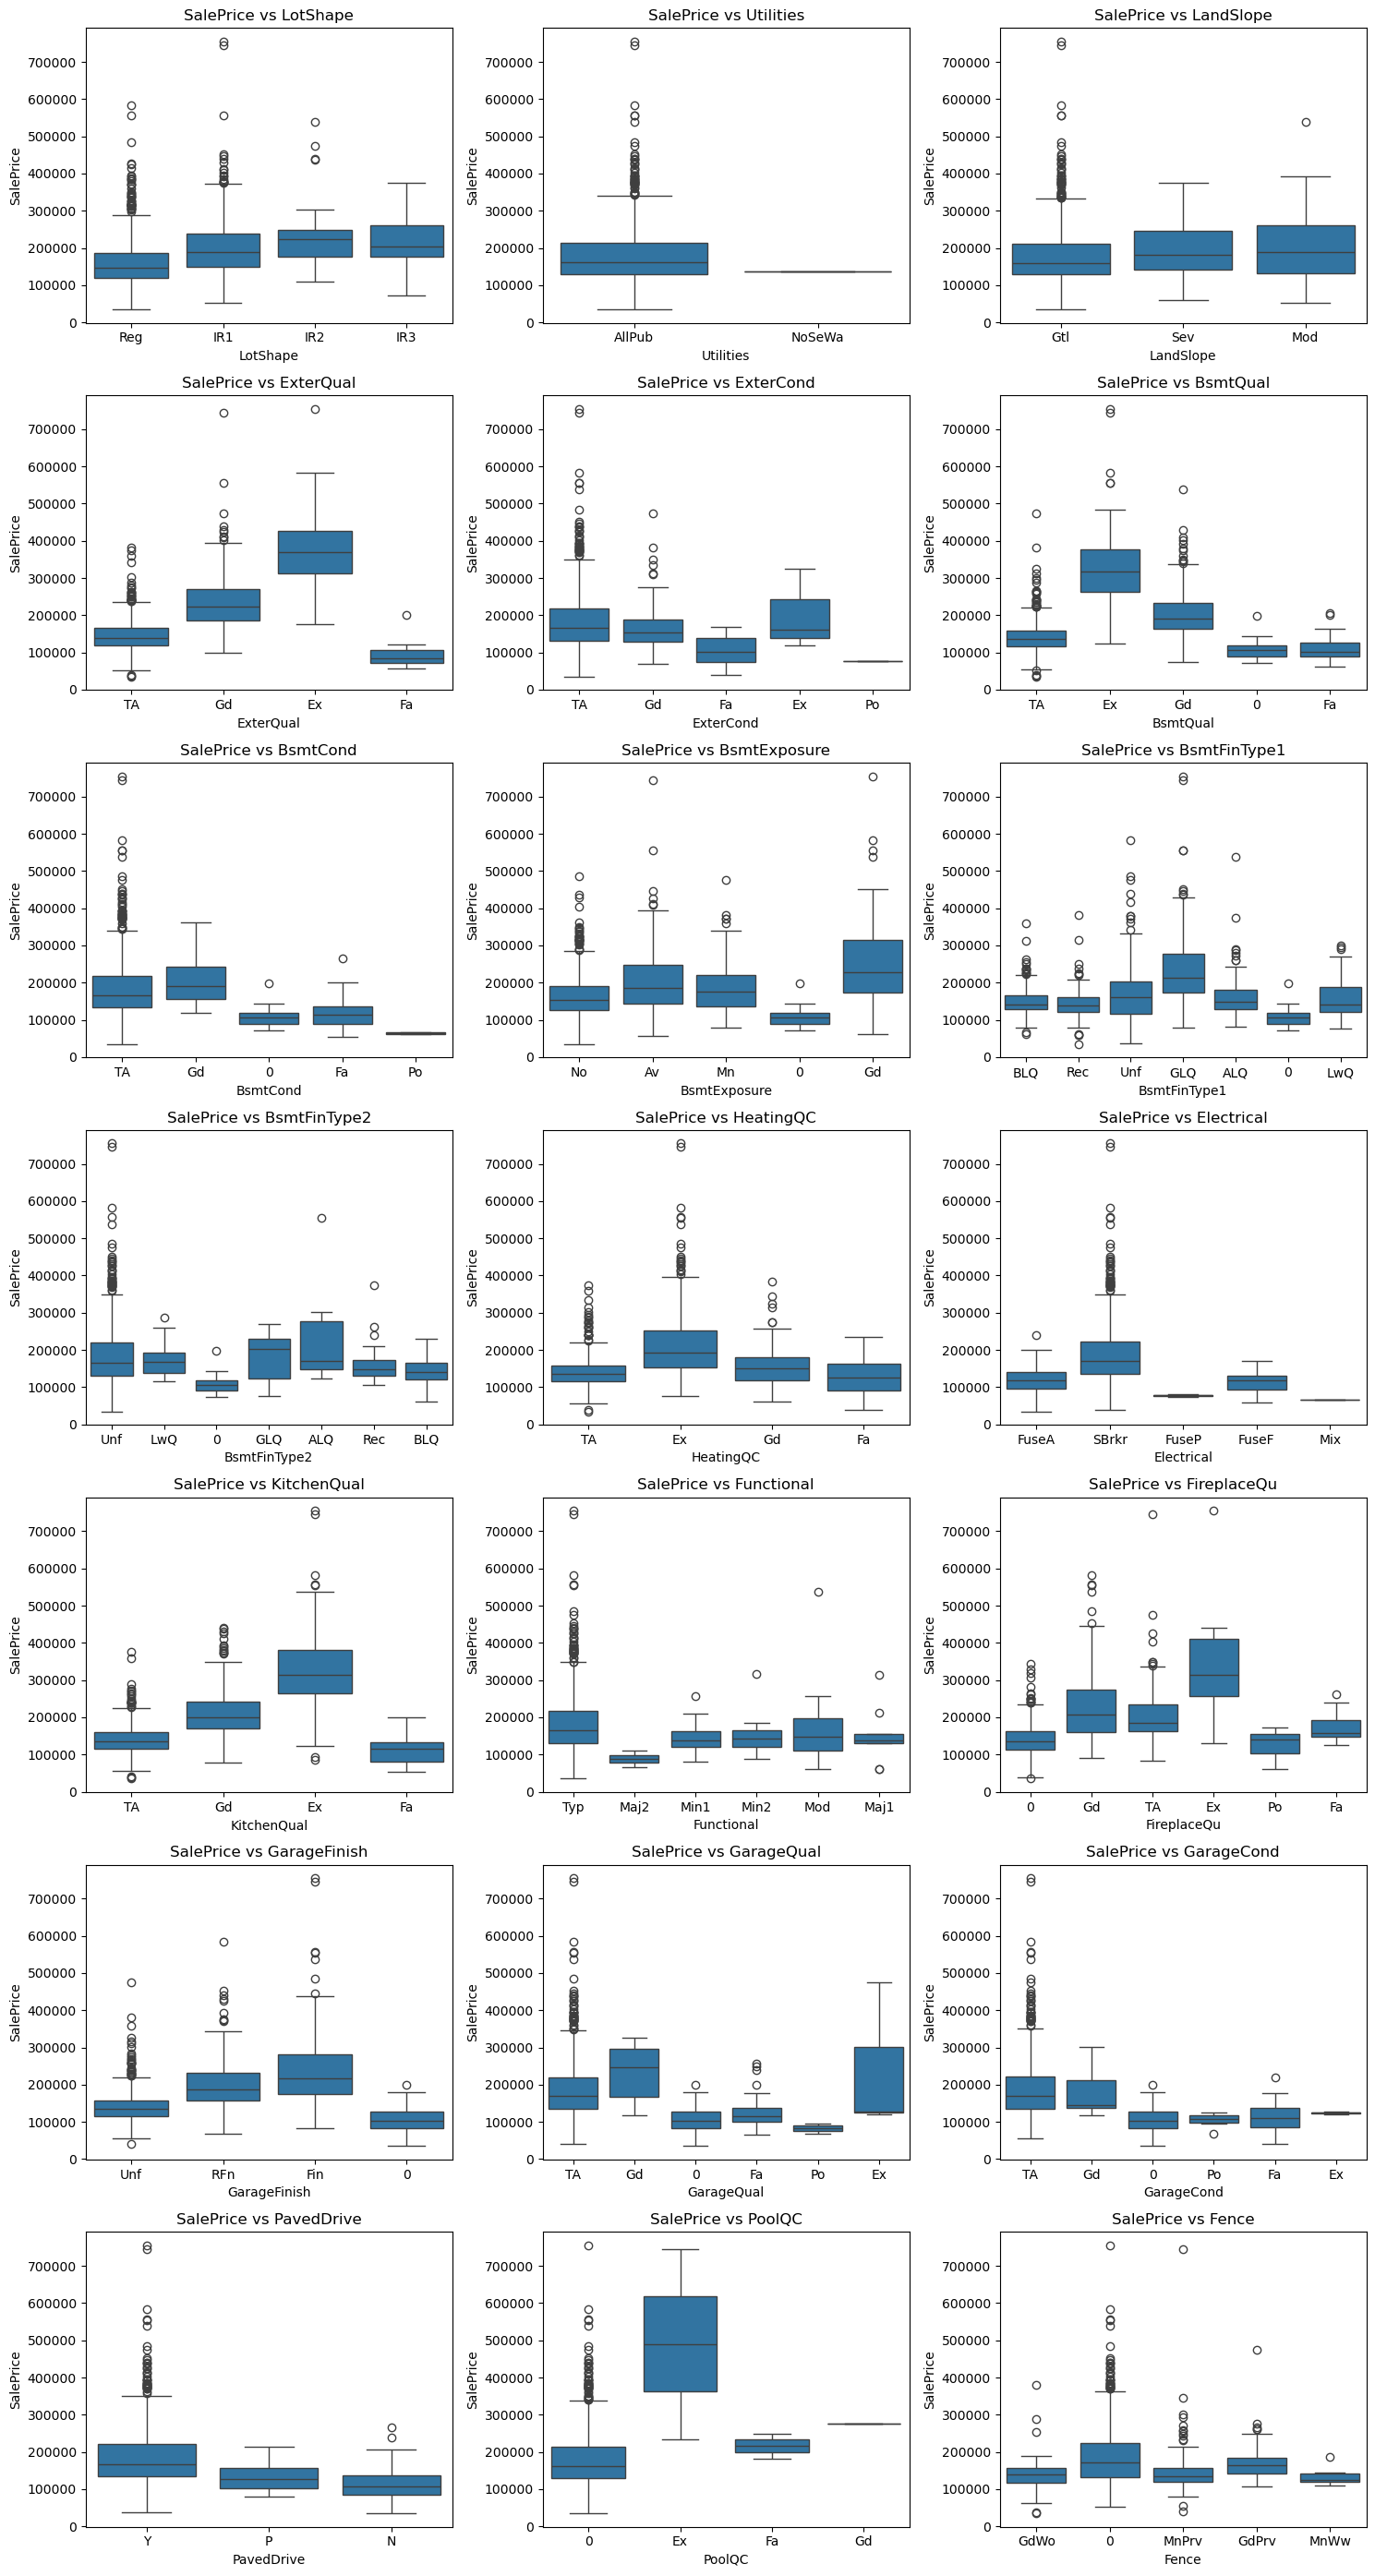

In [281]:
# Visualizamos box-plots con variables categóricas ordinales vs. SalePrice
df_train_plot = pd.concat([y_train_og, X_train_og], axis=1)

len(caract_categoricas_ordinales)

plt.figure(figsize=(5*3, 4*7))
k=0

for caract_cat in caract_categoricas_ordinales:
    k += 1
    plt.subplot(7, 3, k)
    sns.boxplot(x=str(caract_cat), y='SalePrice', data=df_train_plot)
    plt.title('SalePrice vs '+str(caract_cat))
    plt.xlabel(str(caract_cat))
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


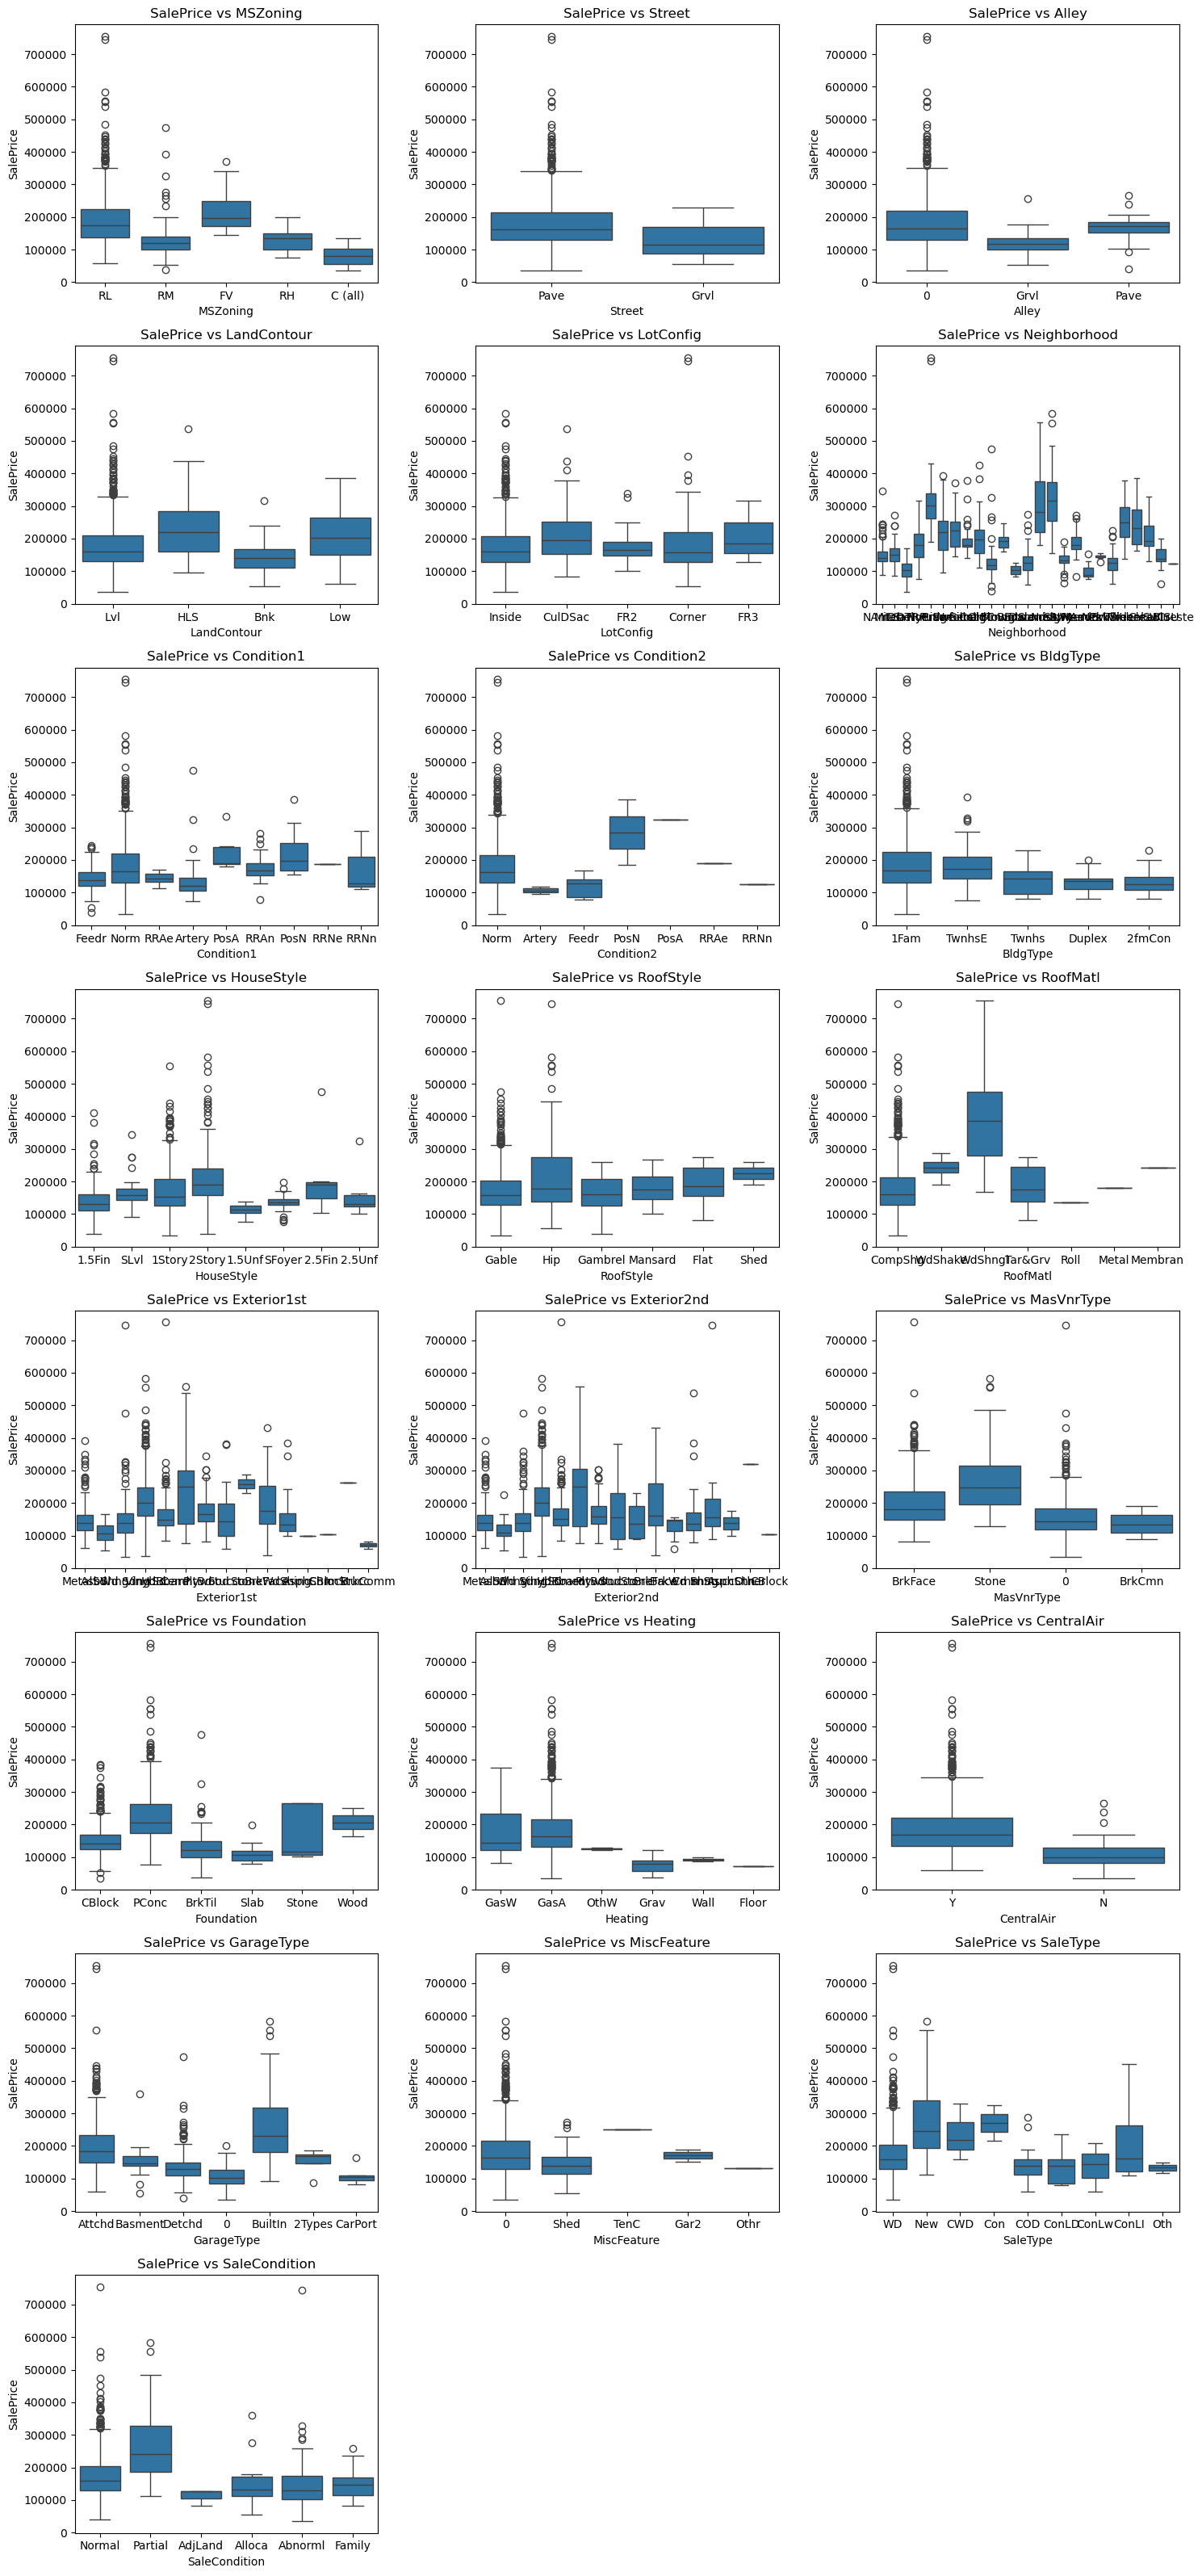

In [282]:
# CAMBIOS MARTA
# Hacemos lo mismo de antes para las variables categóricas nominales
len(caract_categoricas_nominales)

plt.figure(figsize=(5*3, 4*8))
k=0

for caract_cat in caract_categoricas_nominales:
    k += 1
    plt.subplot(8, 3, k)
    sns.boxplot(x=str(caract_cat), y='SalePrice', data=df_train_plot)
    plt.title('SalePrice vs '+str(caract_cat))
    plt.xlabel(str(caract_cat))
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


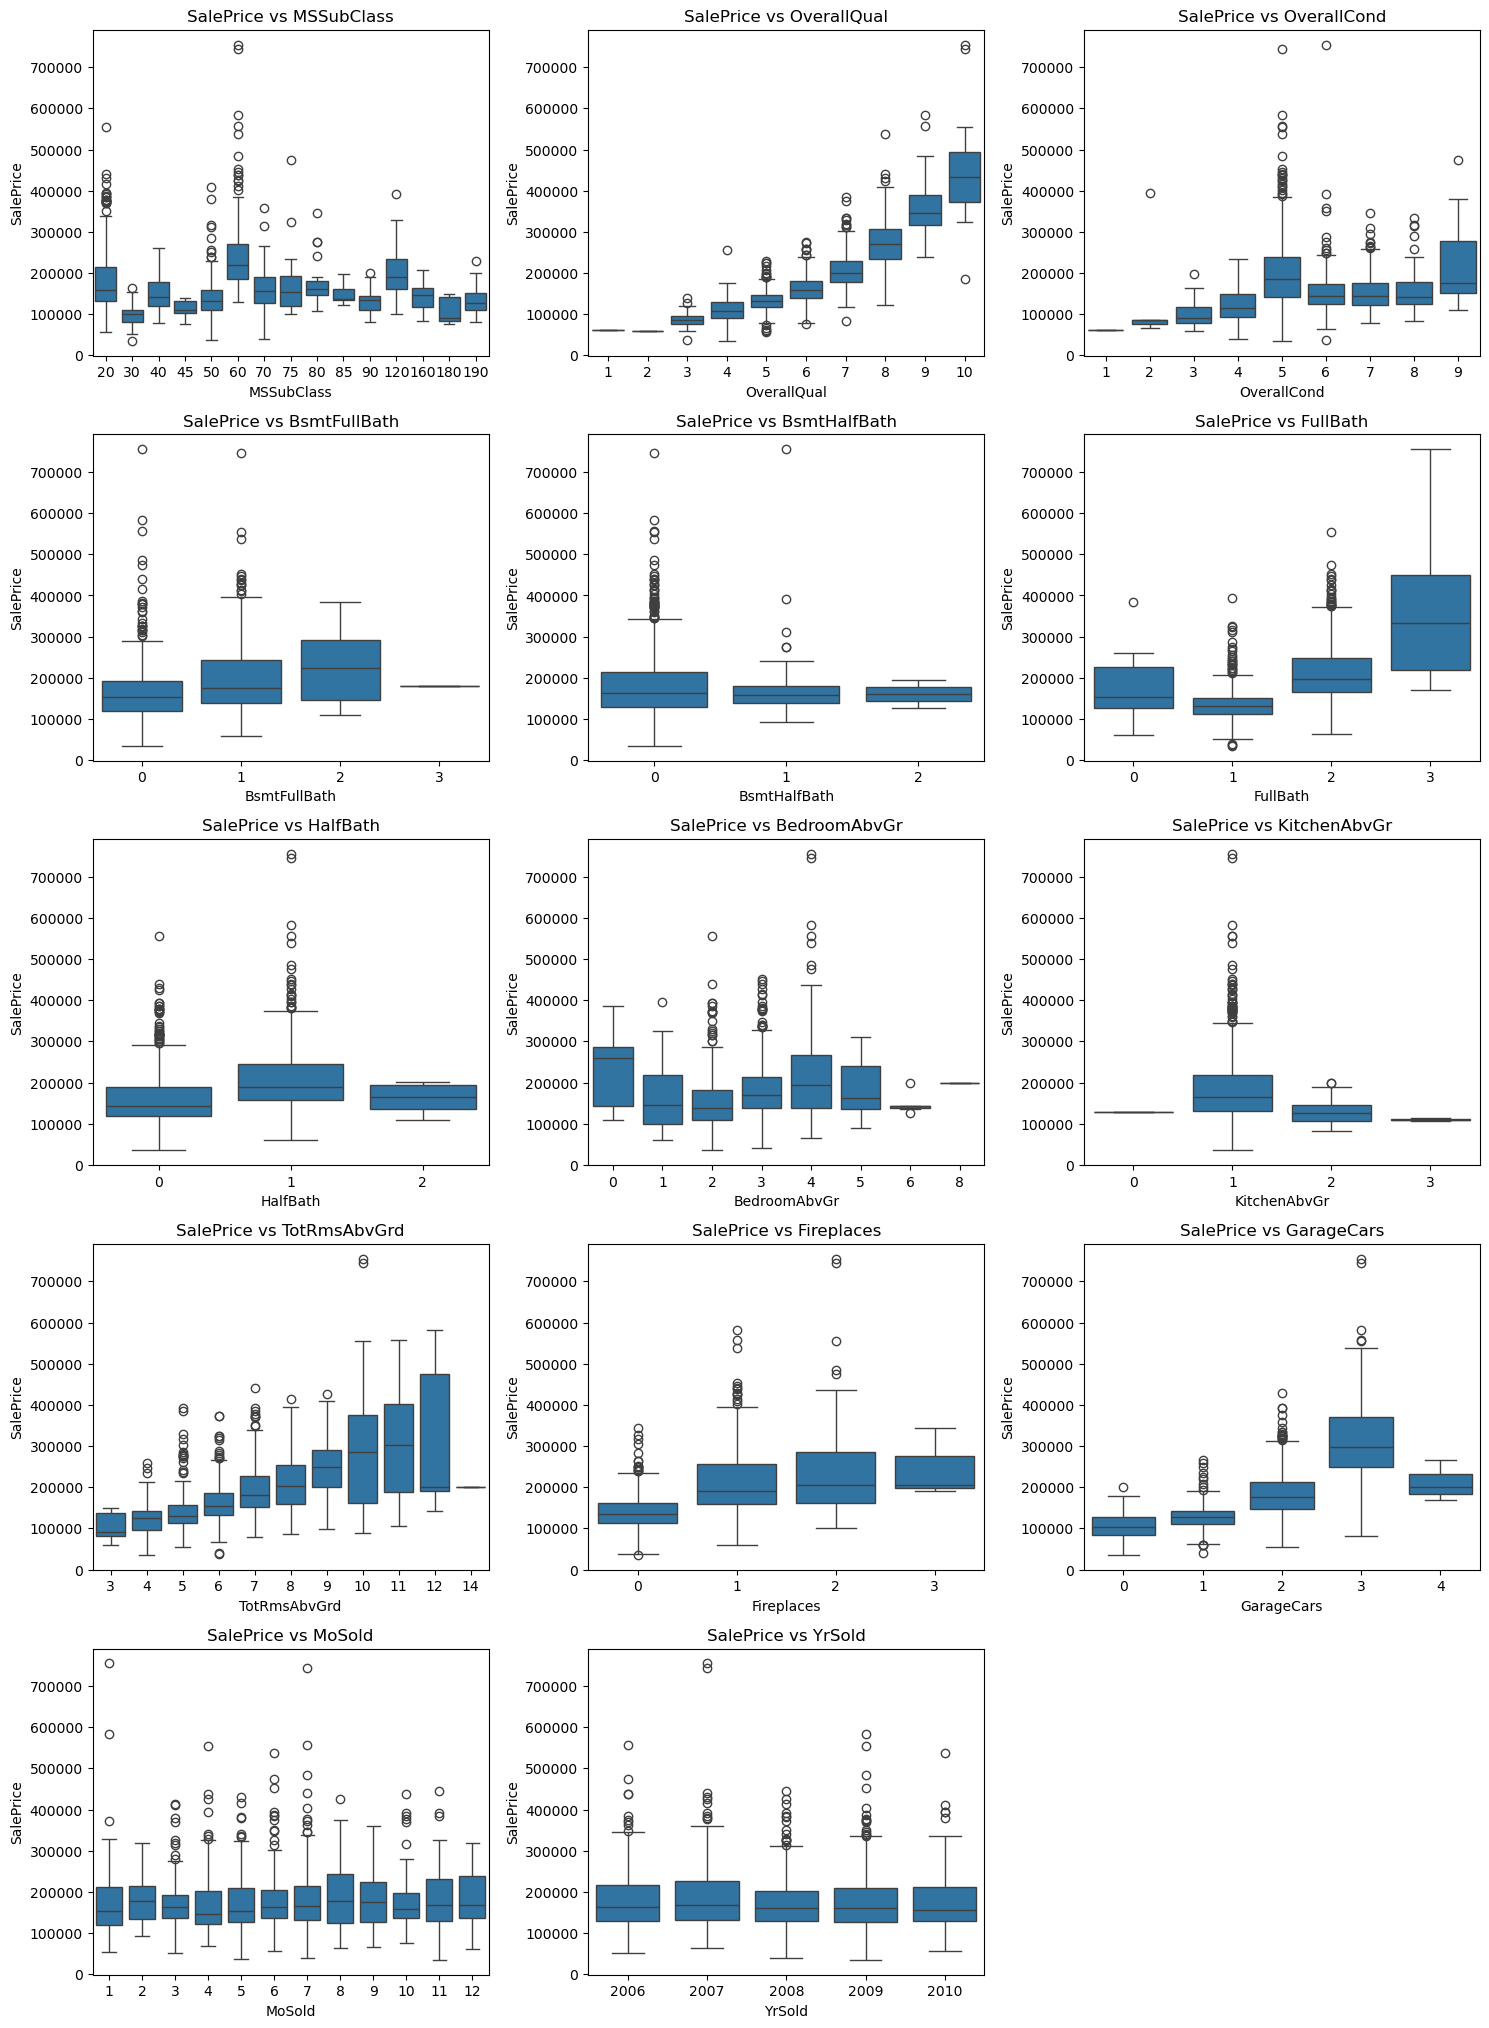

In [283]:
# CAMBIOS MARTA
# Hacemos lo mismo de antes para las variables numéricas discretas
vars_discretas = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
    'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
len(vars_discretas)

plt.figure(figsize=(5*3, 4*6))
k=0

for caract_cat in vars_discretas:
    k += 1
    plt.subplot(6, 3, k)
    sns.boxplot(x=str(caract_cat), y='SalePrice', data=df_train_plot)
    plt.title('SalePrice vs '+str(caract_cat))
    plt.xlabel(str(caract_cat))
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

##### 7.2.2 Comparación de las diferentes características entre sí

Con este pequeño estudi se podrán ver si hay redundancia entre las características, para así no usar o eliminar aquellas que presenten la misma información a la hora de predecir la etiqueta

- **Características numéricas vs características numéricas** 

Cálculo de la **correlación de Pearson** entre las variables numéricas para luego hacer la **matriz de correlación**

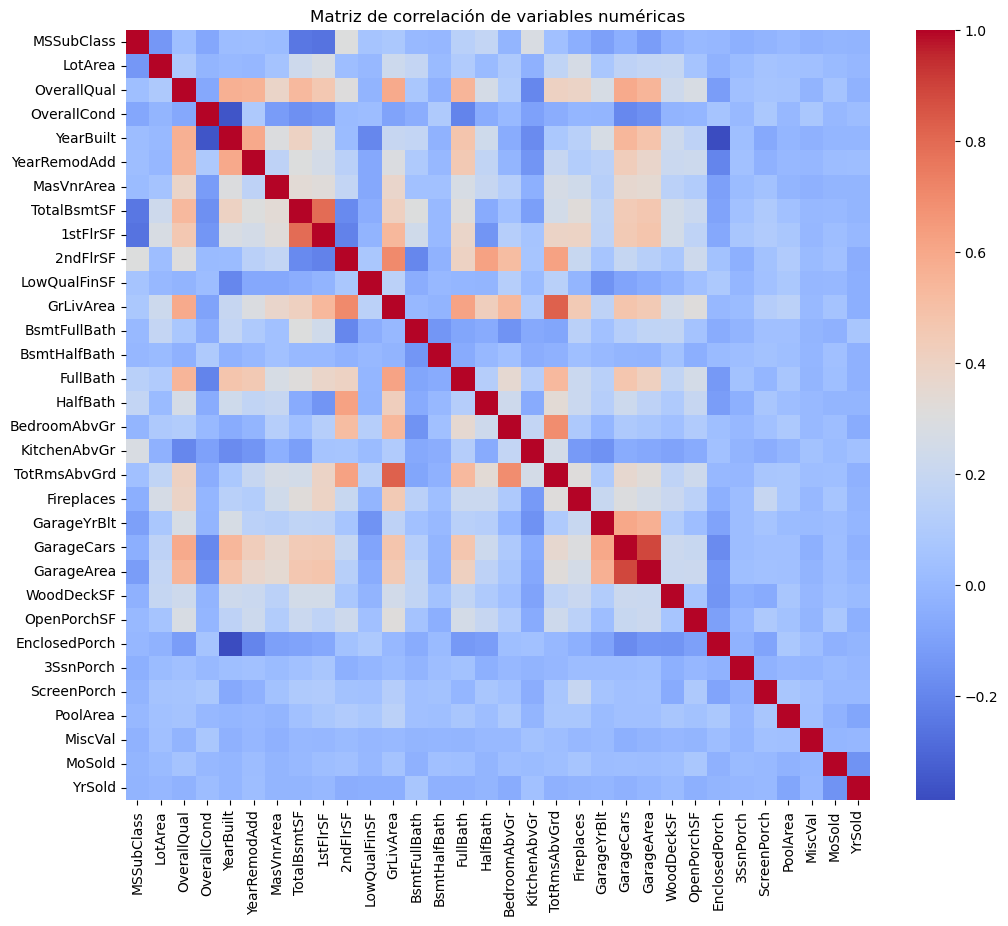

In [ ]:
# CAMBIOS MARTA

# Cálculo de la matriz de correlación
corr_matrix = X_train_og[features].corr()

# Visualización mapa calor de la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,  fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación de variables numéricas")
plt.show()


In [340]:
# CAMBIOS MARTA

# Cogemos los valores absolutos
corr_matrix_abs = corr_matrix.abs()

# Eliminamos la diagonal y la parte inferior (para no repetir pares)
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Filtrar las parejas con correlación mayor a 0.8
high_corr_pairs = [(col, row, upper.loc[row, col]) 
                   for col in upper.columns 
                   for row in upper.index 
                   if upper.loc[row, col] > 0.8]

# Convertimos a DataFrame para mejor visualización
for i,j,k in high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=[i,j,k])

print(high_corr_df)


     GarageArea  GarageCars  0.891136
0  TotRmsAbvGrd   GrLivArea  0.826018
1    GarageArea  GarageCars  0.891136


## 8. Segunda prueba

#### Versión 2 (ANDRES)
Se procederá a realizar un modelo usando como datos las variables numéricos para ver el comportamiento inicial del modelo. Los modelos a entrenar son los siguientes:
- Regresión lineal 
- Random forest


## 4. Outliers


Se crea un boxplots de solo las variables numericas para identificar posibles outlayers
Valores como 
BsmtFinSF1+BsmtFinSF2+BsmtUnfSF = TotalBsmtSF (Por lo que se mantiene Total y se eliminan para disminuir complejidad)


(1451, 32)


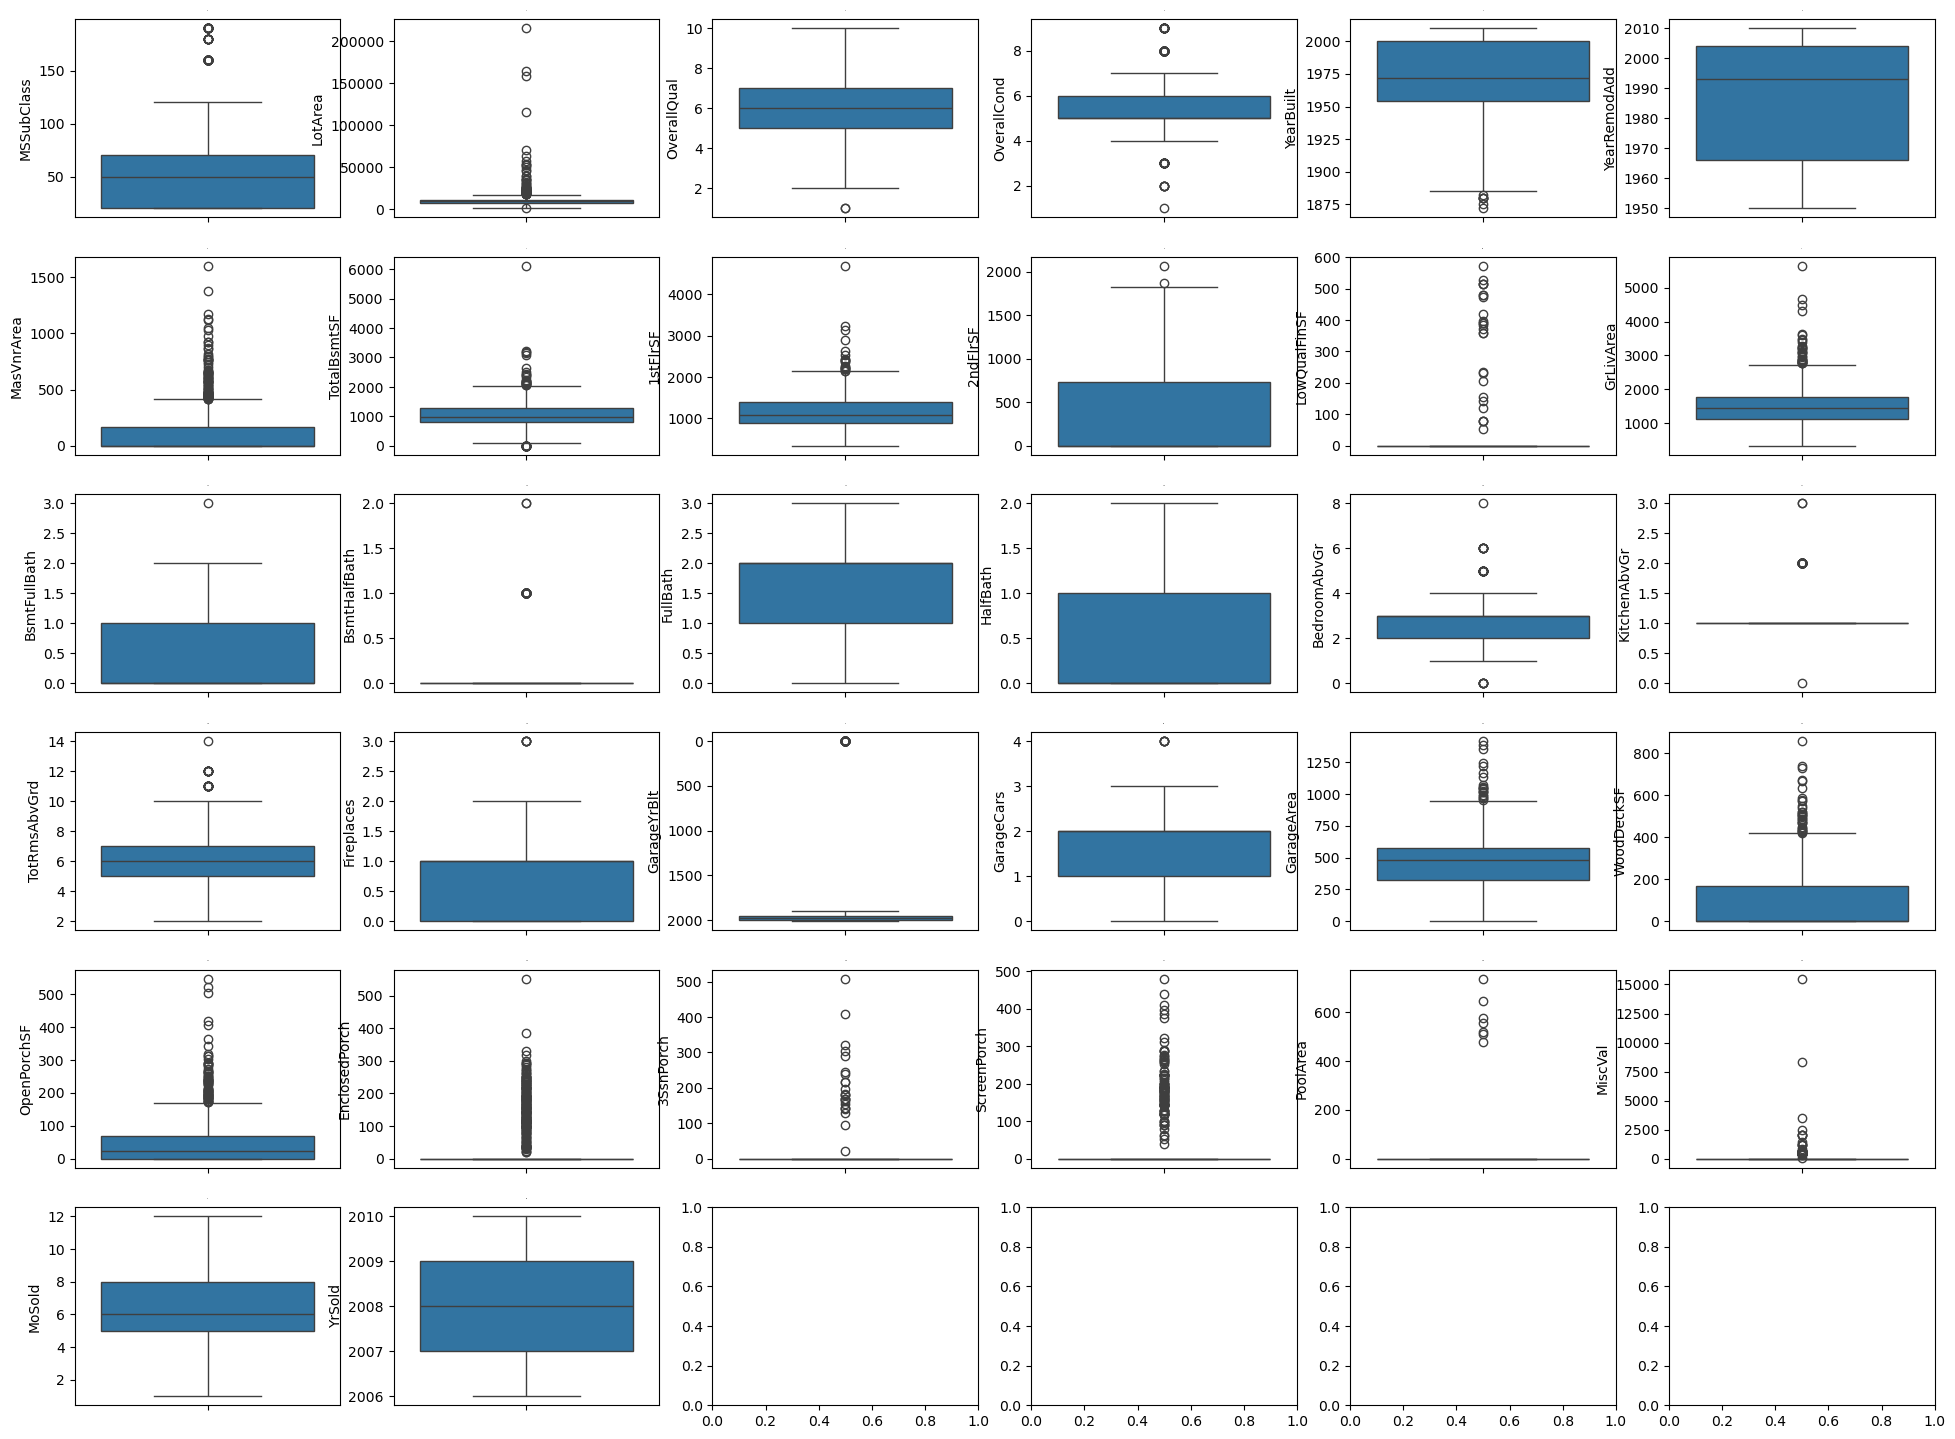

In [284]:
house_features = [
    "MSSubClass",     # Tipo de construcción de la propiedad
    "LotFrontage",    # Metros lineales de frente del terreno
    "LotArea",        # Superficie total del terreno (pies cuadrados) 
    "OverallQual",    # Calidad general de la propiedad (escala 1-10)
    "OverallCond",    # Condición general de la propiedad (escala 1-10)
    "YearBuilt",      # Año de construcción
    "YearRemodAdd",   # Año de remodelación o adición
    "MasVnrArea",     # Área de revestimiento de mampostería (piedra/brick)
    "TotalBsmtSF",    # Superficie total del sótano
    "1stFlrSF",       # Superficie del primer piso
    "2ndFlrSF",       # Superficie del segundo piso
    "LowQualFinSF",   # Superficie de acabado de baja calidad
    "GrLivArea",      # Área habitable por encima del nivel del suelo
    "BsmtFullBath",   # Número de baños completos en el sótano
    "BsmtHalfBath",   # Número de medios baños en el sótano
    "FullBath",       # Número de baños completos arriba del nivel del suelo
    "HalfBath",       # Número de medios baños arriba del nivel del suelo
    "BedroomAbvGr",   # Número de dormitorios sobre el nivel del suelo
    "KitchenAbvGr",   # Número de cocinas sobre el nivel del suelo
    "TotRmsAbvGrd",   # Número total de habitaciones sobre el nivel del suelo (sin contar baños)
    "Fireplaces",     # Número de chimeneas
    "GarageYrBlt",    # Año de construcción del garaje
    "GarageCars",     # Capacidad de autos del garaje
    "GarageArea",     # Área del garaje
    "WoodDeckSF",     # Área del deck de madera
    "OpenPorchSF",    # Área del porch abierto
    "EnclosedPorch",  # Área del porch cerrado
    "3SsnPorch",      # Área del porch de 3 estaciones
    "ScreenPorch",    # Área del porch con malla
    "PoolArea",       # Área de la piscina
    "MiscVal",        # Valor de otras mejoras
    "MoSold",         # Mes de venta
    "YrSold"          # Año de venta
]


print(numerical_values.shape)

# Aplanar axes para iterar fácilmente
# Número de filas y columnas del grid
n_cols = 6
n_rows = 6

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()  # Convertir a 1D para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot por cada columna
for i, col in enumerate(numerical_values.columns):
    sns.boxplot(y=numerical_values[col], ax=axes[i])
    axes[i].set_title(i, fontsize=0.1)

plt.show()

Se ha procedido a examinar en cada caso si los valores que se consideran anómalos son debidos a un error y/o irrealistas. Viendo los resultados de los BoxPlots, se ha considerado que los datos anómalos considerados anómalos nos son debidos a un error, y por lo tanto, no se van a imputar ni eliminar 

- Para identificar y tratar los outliers de las variables categóricas, se van a visualizar los gráficos de barras de frecuencias de cada una de ellas, para así observar aquellas clases que tienen una proporción minoritaria y estudiar en grandes rasgos el origen de los datos.

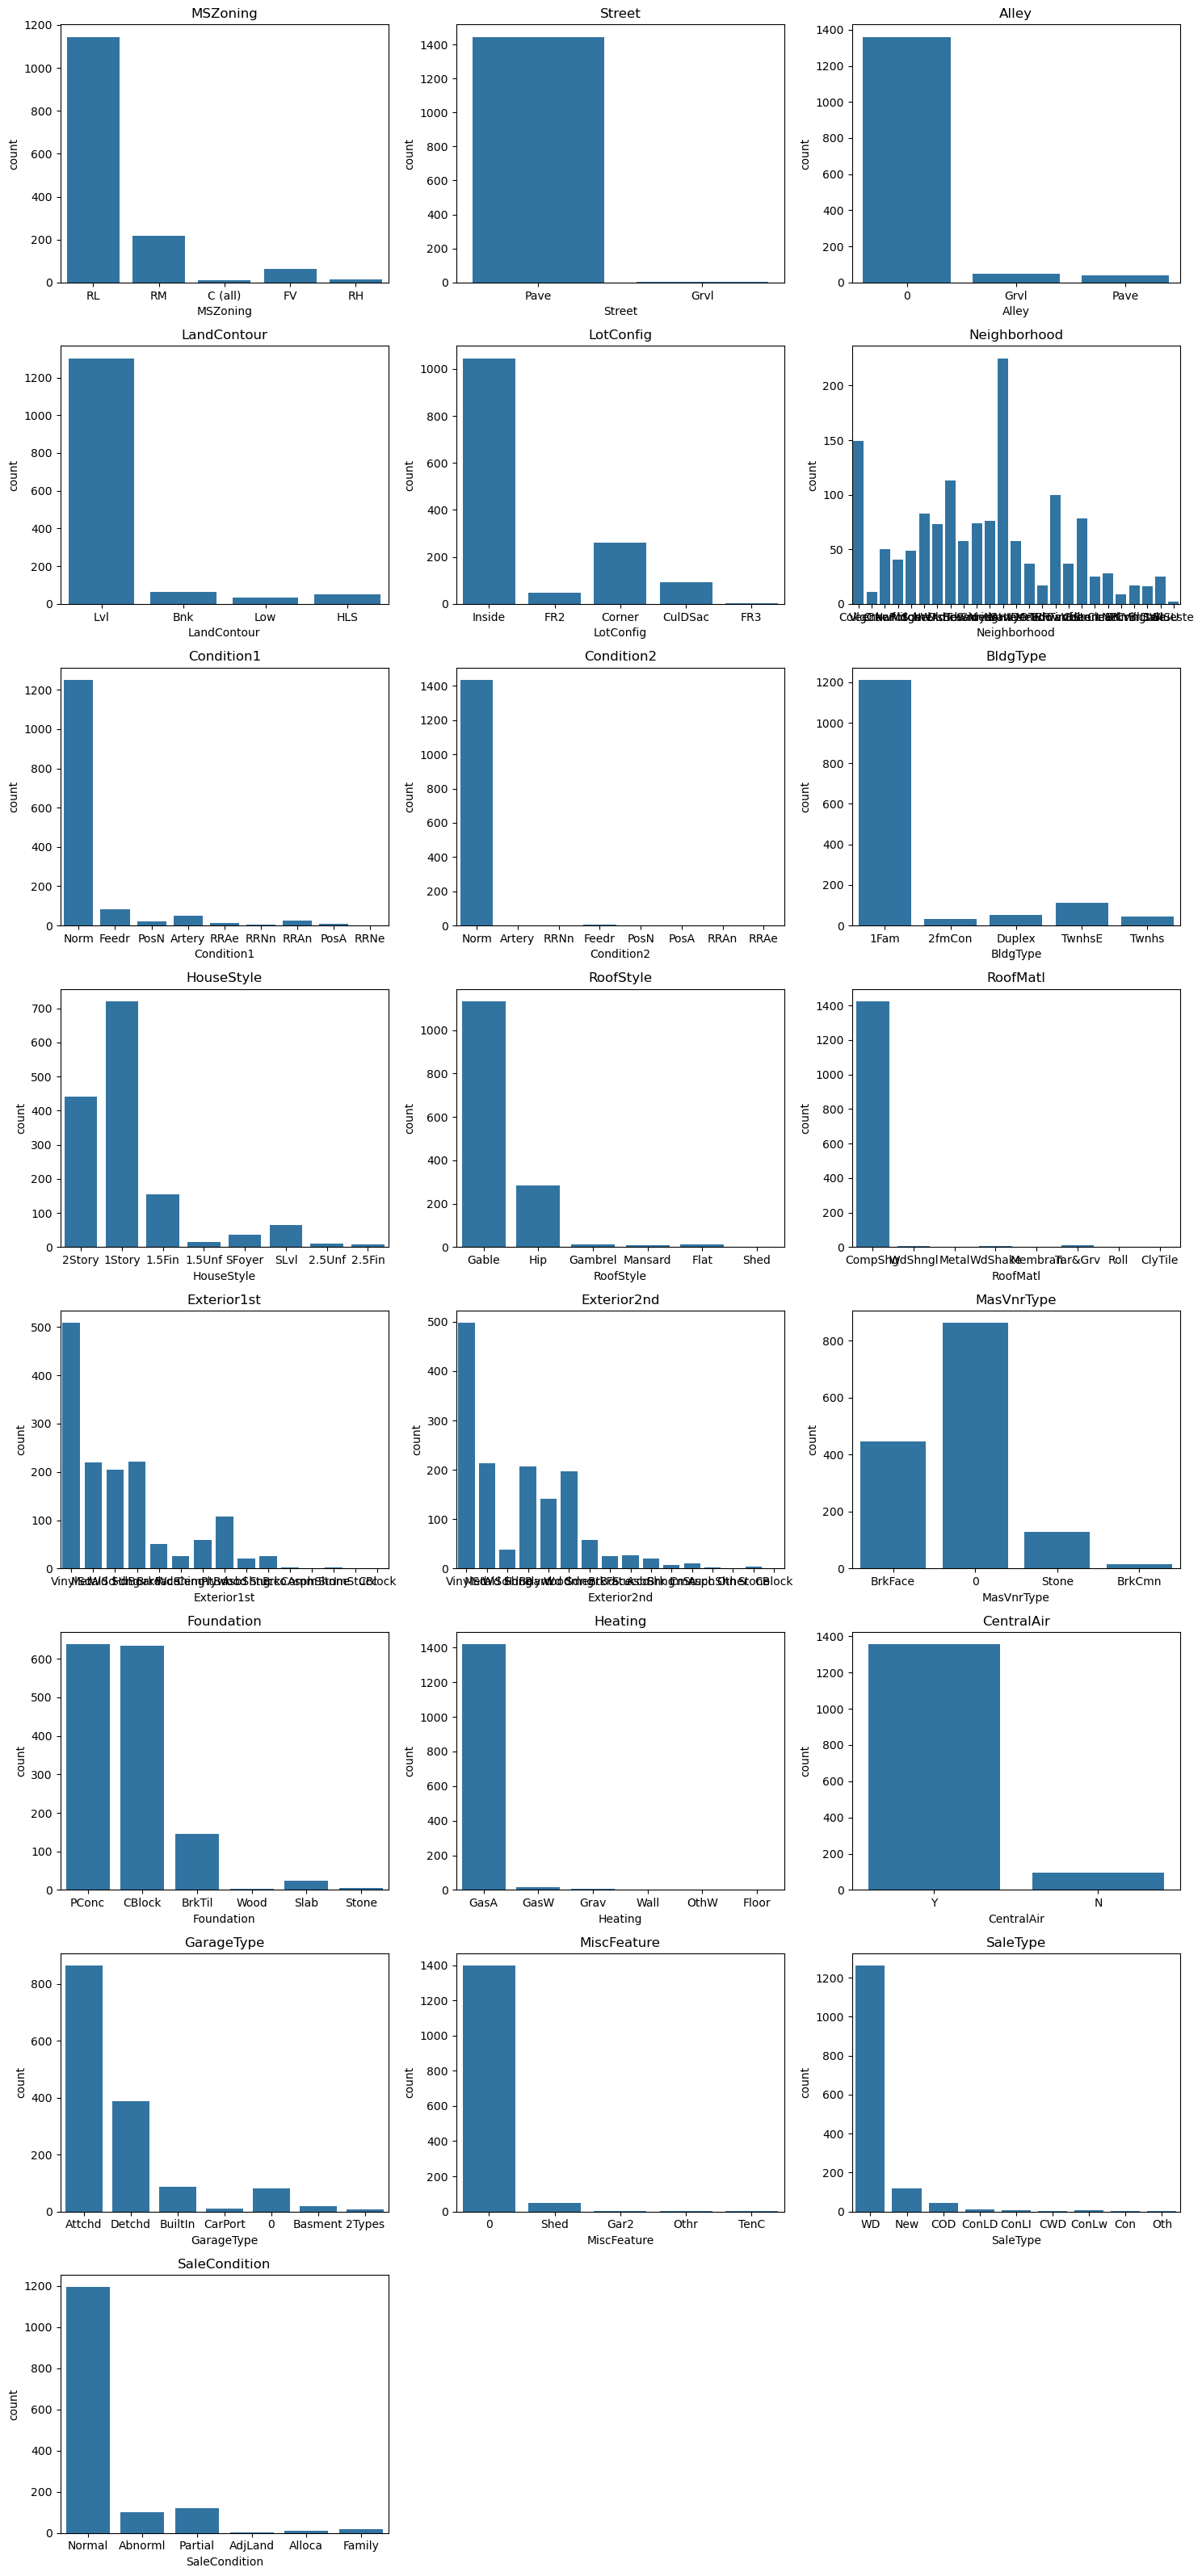

In [285]:
# visualización de barras de frecuencia de las variables categóricas nominales
k=0
plt.figure(figsize=(5*3, 4*8))
for caract in caract_categoricas_nominales:
    k += 1
    plt.subplot(8, 3, k)
    sns.countplot(x=str(caract), data=train_dataset)
    plt.title(str(caract))
plt.tight_layout()
plt.show()

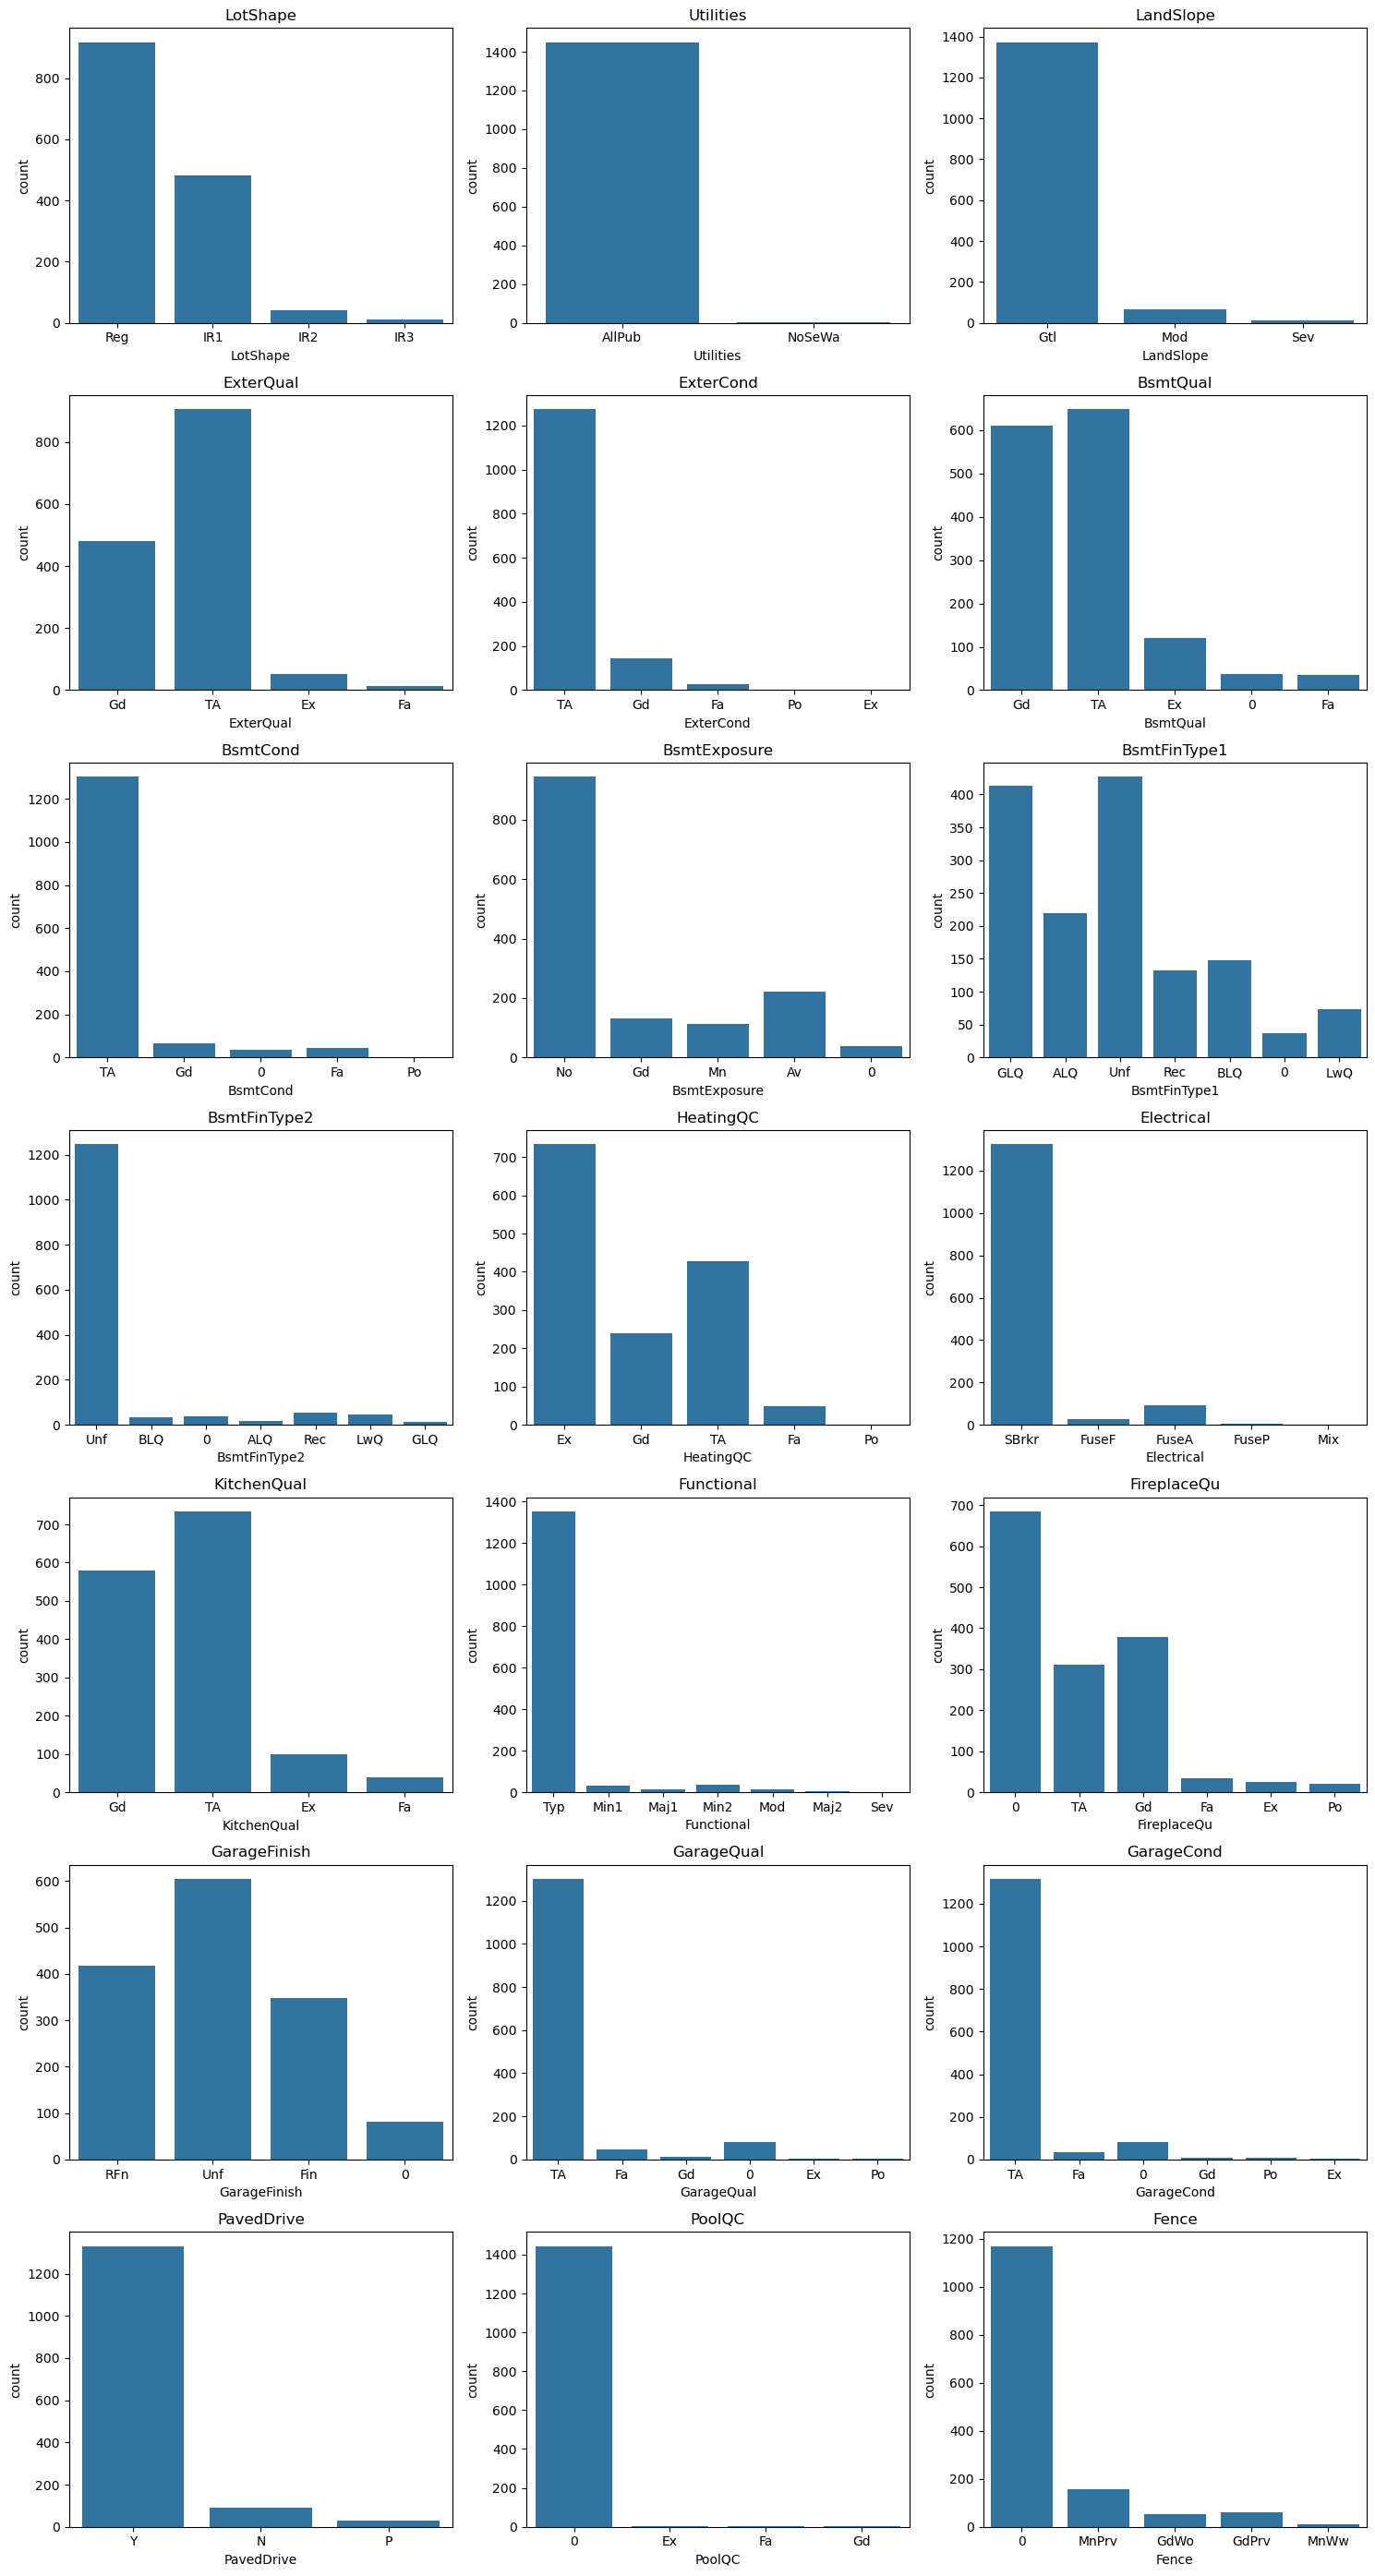

In [286]:
# visualización de barras de frecuencia de las variables categóricas ordinales
k=0
plt.figure(figsize=(5*3, 4*7))
for caract in caract_categoricas_ordinales:
    k += 1
    plt.subplot(7, 3, k)
    sns.countplot(x=str(caract), data=train_dataset)
    plt.title(str(caract))
plt.tight_layout()
plt.show()


Se realiza una prueba para ver si hay datos no binarios o numeros

In [287]:
#Comprobar si no hay datos diferentes en el dataset # Obtener las columnas que NO son numéricas ni booleanas
no_numericas = X_train.columns[
    ~X_train.dtypes.apply(lambda x: np.issubdtype(x, np.number) or np.issubdtype(x, np.bool_))
]
print(f'Las no numericas son:{no_numericas}')

# Mostrar sus primeras filas
X_train[no_numericas].head()

Las no numericas son:Index([], dtype='object')


""
1262
625
37
1160
121


## 9. Segunda prueba

In [312]:
# Creación de df para acumular errores y otros parámetros de los distintos modelos
resultados = pd.DataFrame(columns=['Modelo', 'RMSE_train', 'RMSE_val', 'Features'])

### 9.1 Regresión lineal

Tamaño de predict en train: 1160
El RMSE es: 0.09825306771153719
Las variables de mayor a menor son: ['Condition2_PosN', 'MiscFeature_Gar2', 'Condition2_PosA', 'MSZoning_C (all)', 'Exterior1st_BrkComm', 'MiscFeature_Othr', 'Condition2_Feedr', 'RoofStyle_Shed', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'LotConfig_FR3', 'Heating_Floor', 'Utilities', 'RoofMatl_WdShngl', 'Neighborhood_Crawfor', 'Condition2_RRNn', 'GarageType_0', 'SaleType_Oth', 'Heating_GasW', 'RoofMatl_Membran', 'Neighborhood_NridgHt', 'SaleType_ConLI', 'SaleCondition_AdjLand', 'MSZoning_FV', 'SaleCondition_Partial', 'RoofMatl_Tar&Grv', 'RoofStyle_Gambrel', 'Heating_Grav', 'Exterior1st_BrkFace', 'RoofMatl_WdShake', 'BldgType_2fmCon', 'MiscFeature_0', 'Exterior2nd_Stucco', 'SaleType_WD', 'Neighborhood_Edwards', 'Exterior2nd_VinylSd', 'OverallQual', 'Exterior1st_Stucco', 'MSZoning_RL', 'Condition2_Norm', 'Condition2_RRAe', 'Condition1_RRAe', 'Heating_Wall', 'MSZoning_RH', 'SaleType_New', 'Neighborhood_Blueste', 'Found

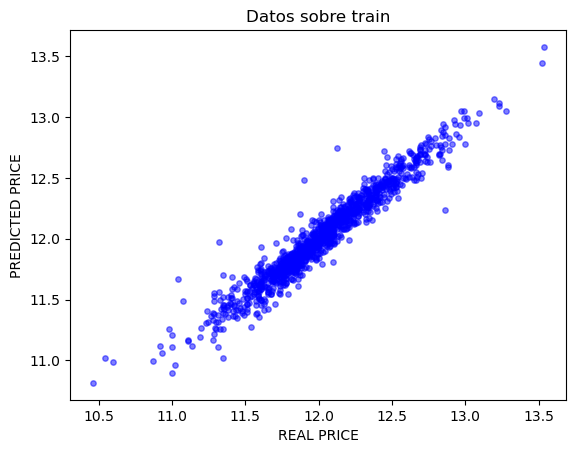

Tamaño de predict en train: 291
El RMSE es: 0.17211322411251068


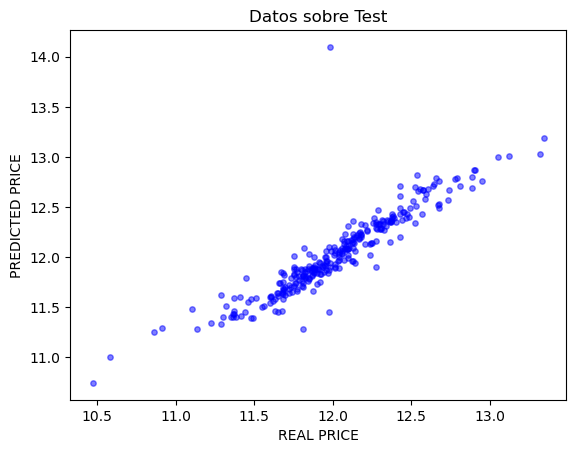

C:\Users\marta\AppData\Local\Temp\ipykernel_15160\312464978.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({


In [313]:
# Regresion lineal con variables numéricas:

lr = LinearRegression()         # instanciar regresión lineal

lr.fit(X_train, y_train)        # ajustar/entrenar modelo
predY = lr.predict(X_train)     # predecir valores y_train con el modelo

print(f'Tamaño de predict en train: {predY.size}')

a= metrics.mean_squared_error(y_train, predY) # Calculo del MSE
print(f'El RMSE es: {np.sqrt(a)}') # Calculo del RMSE


# Mostrar features ordenadas

features_nombrecillos = X_train.columns.tolist()

coef_dict = dict(zip(features_nombrecillos, lr.coef_.ravel()))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
print(f'Las variables de mayor a menor son: {sorted_keys}')



# Q: Display real Y vs predicted Y.

plt.scatter(y_train,predY,c = 'blue', s=15, alpha=0.5)
plt.title('Datos sobre train')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

#__________________________


#Ahora se calcula en test 

predY_val = lr.predict(X_val)
print(f'Tamaño de predict en train: {predY_val.size}')

a_val= metrics.mean_squared_error(y_val, predY_val)
print(f'El RMSE es: {np.sqrt(a_val)}')


# Q: Display real Y vs predicted Y.

plt.scatter(y_val,predY_val,c = 'blue', s=15, alpha=0.5)
plt.title('Datos sobre Test')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()


#__________________________

# CAMBIOS MARTA
rmse_train = np.sqrt(a)
rmse_val = np.sqrt(a_val)

# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['LinearRegression'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features' : ['Todas']
})], ignore_index=True)


Breve descripción de las primeras 10 variables con más peso: 

1. Condition2_PosN

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Cerca de un elemento positivo fuera del sitio, como parque o zona verde.

2. MiscFeature_Gar2

Qué es: Característica adicional de la propiedad.

Significado: Existe un segundo garaje (no incluido en la sección principal del garage).

3. Condition2_PosA

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Adyacente a un elemento positivo fuera del sitio, por ejemplo, espacio recreativo.

4. MSZoning_C (all)

Qué es: Clasificación de zonificación general de la propiedad.

Significado: Zonas comerciales.

5. Exterior1st_BrkComm

Qué es: Material exterior principal de la casa.

Significado: Construcción con ladrillo común en la fachada principal.

6. MiscFeature_Othr

Qué es: Características misceláneas de la propiedad.

Significado: Incluye otras características que no están cubiertas en otras categorías.

7. Condition2_Feedr

Qué es: Segunda condición de proximidad de la propiedad.

Significado: Cerca de una calle alimentadora (feeder street).

8. RoofStyle_Shed

Qué es: Estilo de techo de la propiedad.

Significado: Techo tipo shed, con una sola pendiente.

9. Neighborhood_MeadowV

Qué es: Ubicación física dentro de la ciudad de Ames.

Significado: Propiedad ubicada en el vecindario Meadow Village.

10. Neighborhood_StoneBr

Qué es: Ubicación física dentro de la ciudad de Ames.

Significado: Propiedad ubicada en el vecindario Stone Brook.

### 9.1.2 Regresión Lineal Variables Filtradas

- Nos disponemos a entrenar un modelo Lasso para poder filtrar las variables. De esta forma, las variables resultantes se emplearán en futuros modelos para seleccionar el mejor de todos.

In [314]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(cv=5) # Instanciamos Lasso con cross-validation con 5 folds
lasso_cv.fit(X_train, y_train) # Entrenamos modelo lasso

selected_vars = X_train.columns[lasso_cv.coef_ != 0] # se seleccionan variables con coeficientes lasso distintos a 0
print("Variables seleccionadas con LassoCV:", selected_vars)

Variables seleccionadas con LassoCV: Index(['MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Condition1_Norm',
       'Foundation_PConc', 'SaleCondition_Abnorml', 'MSSubClass', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'LowQualFinSF', 'GrLivArea', 'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'PavedDrive', 'Fence',
       'TotalSF', 'TotalBath', 'HouseAge', 'YearSinceRemod',
       'OverallCond_TotalSF', 'OverallQual_TotalSF'],
      dtype='object')


- Con las variables seleccionadas previamente mediante lasso, vamos a entrenar un modelo de regresión lineal

RMSE en entrenamiento: 0.1232028201926896


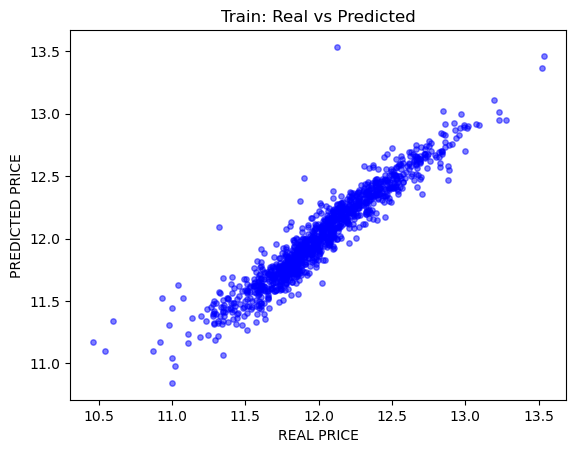

RMSE en validación: 0.17175095074381705


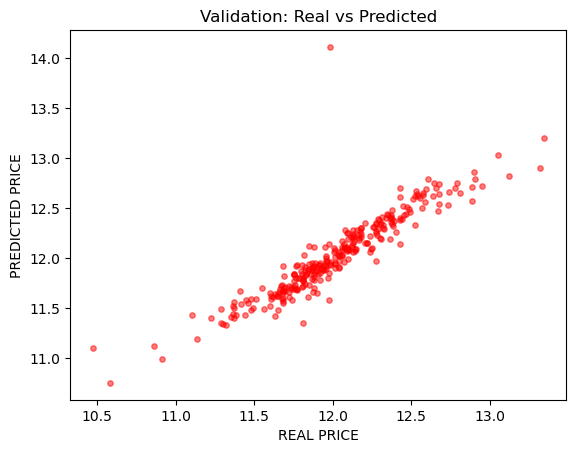

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Lista de variables seleccionadas (coef > 0)
selected_features = [
    'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Condition1_Norm',
    'Foundation_PConc', 'SaleCondition_Abnorml', 'MSSubClass', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'LowQualFinSF', 'GrLivArea', 'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageFinish', 'PavedDrive', 'Fence',
    'TotalSF', 'TotalBath', 'HouseAge', 'YearSinceRemod',
    'OverallCond_TotalSF', 'OverallQual_TotalSF'
]


# Filtrar X_train y X_val solo con las features seleccionadas
X_train_filtrado = X_train[selected_features]
X_val_filtrado   = X_val[selected_features]

# -----------------------
# Ajuste del modelo
# -----------------------
lr = LinearRegression()
lr.fit(X_train_filtrado, y_train)

# Predicción en train
predY_train = lr.predict(X_train_filtrado)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, predY_train))
print(f'RMSE en entrenamiento: {rmse_train}')

# Gráfico real vs predicho en train
plt.scatter(y_train, predY_train, c='blue', s=15, alpha=0.5)
plt.title('Train: Real vs Predicted')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

# -----------------------
# Predicción en validación
# -----------------------
predY_val = lr.predict(X_val_filtrado)
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, predY_val))
print(f'RMSE en validación: {rmse_val}')

# Gráfico real vs predicho en validación
plt.scatter(y_val, predY_val, c='red', s=15, alpha=0.5)
plt.title('Validation: Real vs Predicted')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()


#__________________________

# CAMBIOS MARTA

# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['LinearRegression'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['selected_features']
})], ignore_index=True)

- Ahora, entrenamos un modelo de regresión lineal con las variables que mayor correlación tenían con respecto a SalePrice

RMSE en entrenamiento: 0.13556461863080752


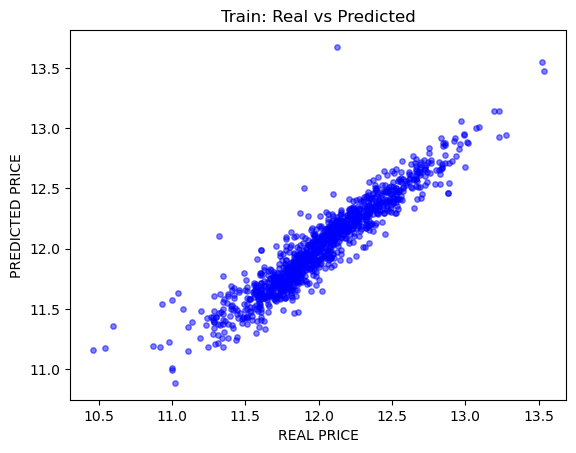

RMSE en validación: 0.1948852476889368


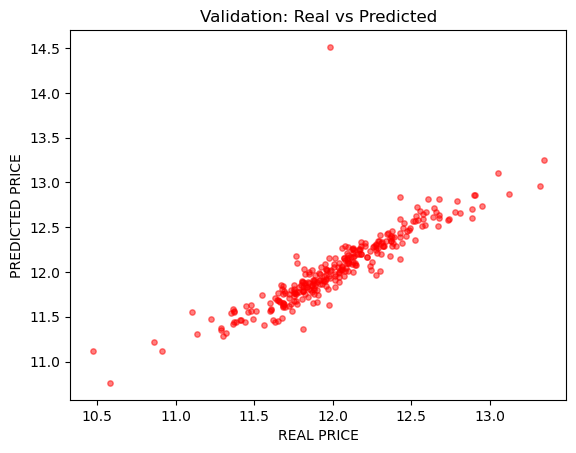

In [316]:
# CAMBIOS MARTA

# Filtrar X_train y X_val solo con las 50 características que tienen mayor correlación con la etiqueta
X_train_filtrado_corr = X_train[corr_50_vars]
X_val_filtrado_corr   = X_val[corr_50_vars]

# -----------------------
# Ajuste del modelo
# -----------------------
lr = LinearRegression()
lr.fit(X_train_filtrado_corr, y_train)

# Predicción en train
predY_train = lr.predict(X_train_filtrado_corr)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, predY_train))
print(f'RMSE en entrenamiento: {rmse_train}')

# Gráfico real vs predicho en train
plt.scatter(y_train, predY_train, c='blue', s=15, alpha=0.5)
plt.title('Train: Real vs Predicted')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

# -----------------------
# Predicción en validación
# -----------------------
predY_val = lr.predict(X_val_filtrado_corr)
rmse_val = np.sqrt(metrics.mean_squared_error(y_val, predY_val))
print(f'RMSE en validación: {rmse_val}')

# Gráfico real vs predicho en validación
plt.scatter(y_val, predY_val, c='red', s=15, alpha=0.5)
plt.title('Validation: Real vs Predicted')
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()


#__________________________

# CAMBIOS MARTA

# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['LinearRegression'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['corr_50_vars']
})], ignore_index=True)


In [317]:
resultados

,Modelo,RMSE_train,RMSE_val,Features
0,LinearRegression,0.098253,0.172113,Todas
1,LinearRegression,0.123203,0.171751,selected_features
2,LinearRegression,0.135565,0.194885,corr_50_vars


### 9.2 Decision Tree

In [319]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
#depth_grid = [10]
#min_samples_leaf_grid = [10]
#max_leaf_nodes_grid = [15]
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1) # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))



# Q: Instantiate a Decision Tree Classifier with the best parameters from above. 

DTC_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, y_train)
Y_pred = DTC_best.predict(X_val)
print( "Tree RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(y_val,Y_pred)),8)))

# CAMBIOS MARTA

Y_pred_train = DTC_best.predict(X_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train,Y_pred_train))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val,Y_pred))
#---------HASTA AQUÍ CAMBIOS MARTA-------------------------



# Q: What would be the ACC for a DT with the default parameters? What is the improvement we get with a grid search of the best hyperparams? 

DTC_default = DecisionTreeRegressor()
DTC_default.fit(X_train, y_train)
Y_pred = DTC_default.predict(X_val)
print( "Tree RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(y_val,Y_pred)),8)))


#__________________________

# CAMBIOS MARTA

# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['DecisionTreeRegressor'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['Todas'],
})], ignore_index=True)



c:\Users\marta\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tree best depth : 20
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 20
Tree RMSE : 0.19143489
Tree RMSE : 0.21017435


- Árbol de regresión con características obtenidas con Lasso

In [320]:
# CAMBIOS MARTA

depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1) # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train[selected_features], y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))



# Q: Instantiate a Decision Tree Classifier with the best parameters from above. 

DTC_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train[selected_features], y_train)
Y_pred_train = DTC_best.predict(X_train[selected_features])
Y_pred = DTC_best.predict(X_val[selected_features])


rmse_train = np.sqrt(metrics.mean_squared_error(y_train,Y_pred_train))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val,Y_pred))
print( "Tree RMSE train : " + str(np.round(rmse_train,8)))
print( "Tree RMSE val : " + str(np.round(rmse_val,8)))


#__________________________


# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['DecisionTreeRegressor'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['selected_features'],
})], ignore_index=True)

Tree best depth : 7
Tree best min_samples_leaf : 26
Tree best max_leaf_nodes : 20
Tree RMSE train : 0.16174091
Tree RMSE val : 0.19323638


c:\Users\marta\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


- Árbol de regresión con 50 primeras características con mejor correlación

In [321]:
# CAMBIOS MARTA

depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1) # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train[corr_50_vars], y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))



# Q: Instantiate a Decision Tree Classifier with the best parameters from above. 

DTC_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train[corr_50_vars], y_train)
Y_pred_train = DTC_best.predict(X_train[corr_50_vars])
Y_pred = DTC_best.predict(X_val[corr_50_vars])


rmse_train = np.sqrt(metrics.mean_squared_error(y_train,Y_pred_train))
rmse_val = np.sqrt(metrics.mean_squared_error(y_val,Y_pred))
print( "Tree RMSE train : " + str(np.round(rmse_train,8)))
print( "Tree RMSE val : " + str(np.round(rmse_val,8)))


#__________________________


# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['DecisionTreeRegressor'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['corr_50_vars'],
})], ignore_index=True)

Tree best depth : 5
Tree best min_samples_leaf : 26
Tree best max_leaf_nodes : 20
Tree RMSE train : 0.18038357
Tree RMSE val : 0.18861289


#### 9.3 Bagging - Random Forest

In [343]:
# Random forest con variables numéricas:

RFR = RandomForestRegressor(n_estimators=1000,max_depth=None,min_samples_leaf=1,random_state=123)
RFR.fit(X_train, y_train)
predY = RFR.predict(X_train)


a= metrics.mean_squared_error(y_train, predY)
print(f'El valor RMSE de train es de: {np.sqrt(a)}')

# CAMBIOS MARTA
rmse_train = np.sqrt(a)
# --------- FIN CAMBIOS MARTA --------------

# Mostrar features ordenadas
features_nombrecillos = X_train.columns.tolist()

coef_dict = dict(zip(features_nombrecillos, RFR.feature_importances_))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
print(f'Las variables de mayor a menor son: {sorted_keys}')


#Prediciendo con el test


predY = RFR.predict(X_val)


a= metrics.mean_squared_error(y_val, predY)
print(f'El valor RMSE de test es de: {np.sqrt(a)}')




# CAMBIOS MARTA

rmse_val = np.sqrt(a)

# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['RandomForestRegressor'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['Todas'],
})], ignore_index=True)


El valor RMSE de train es de: 0.05110857599290899
Las variables de mayor a menor son: ['OverallQual', 'OverallQual_TotalSF', 'TotalSF', 'OverallCond_TotalSF', 'GrLivArea', 'TotalBath', 'YearBuilt', 'LotArea', 'CentralAir_Y', '2ndFlrSF', 'GarageFinish', 'CentralAir_N', 'GarageArea', 'YearRemodAdd', 'OverallCond', 'MSZoning_RM', 'GarageYrBlt', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'HouseAge', 'YearSinceRemod', 'BsmtFinType1', 'OpenPorchSF', 'MoSold', 'FireplaceQu', 'WoodDeckSF', 'MSSubClass', 'TotRmsAbvGrd', 'KitchenQual', 'GarageCond', 'MSZoning_C (all)', 'EnclosedPorch', 'SaleCondition_Abnorml', 'MasVnrArea', 'Fireplaces', 'GarageQual', 'BsmtQual', 'BsmtFullBath', 'GarageType_Detchd', 'BedroomAbvGr', 'BsmtExposure', 'FullBath', 'HeatingQC', 'PavedDrive', 'SaleCondition_Family', 'Fence', 'Functional', 'ExterQual', 'MSZoning_RL', 'LotShape', 'GarageType_Attchd', 'Neighborhood_Crawfor', 'YrSold', 'ExterCond', 'HalfBath', 'SaleCondition_Normal', 'Neighborhood_Edwards', 'Exterior1st_BrkC

Se han dejado las variables más óptimas en el RandomForest de arriba

In [221]:
# from sklearn.model_selection import cross_val_score  # alternativa recomendada

# Parámetros básicos / grid a probar (ajusta según tu necesidad)
n_estimators_list = [50, 100, 200,300,1000]
max_depth_list    = [None, 5, 10]     # None = sin límite de profundidad
min_samples_leaf_list = [1, 2, 4]
random_states = [123]  

best_rmse = np.inf
best_model = None
best_params = None

# Iterar por todas las combinaciones
for n in n_estimators_list:
    for md in max_depth_list:
        for msl in min_samples_leaf_list:
            for rs in random_states:
                # Crear y entrenar el modelo
                rfr = RandomForestRegressor(
                    n_estimators=n,
                    max_depth=md,
                    min_samples_leaf=msl,
                    random_state=rs,
                    n_jobs=-1
                )
                rfr.fit(X_train,y_train.values.ravel())

                # Predecir en training (mejor usar validación/cv)
                predY = rfr.predict(X_val)
                mse = metrics.mean_squared_error(y_val.values.ravel(), predY)
                rmse = np.sqrt(mse)

                # Imprimir resumen de la configuración probada (opcional)
                print(f"n={n:3}, max_depth={str(md):5}, min_samples_leaf={msl:2}, rs={rs:3} -> RMSE = {rmse:.4f}")

                # Guardar el mejor
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_model = rfr
                    best_params = {"n_estimators": n, "max_depth": md, "min_samples_leaf": msl, "random_state": rs}

# Resultado final
print("\nMejor RMSE en training: ", round(best_rmse, 4))
print("Mejores hiperparámetros:", best_params)
# best_model contiene el RandomForestRegressor entrenado con esos hiperparámetros

n= 50, max_depth=None , min_samples_leaf= 1, rs=123 -> RMSE = 0.1471
n= 50, max_depth=None , min_samples_leaf= 2, rs=123 -> RMSE = 0.1525
n= 50, max_depth=None , min_samples_leaf= 4, rs=123 -> RMSE = 0.1521
n= 50, max_depth=5    , min_samples_leaf= 1, rs=123 -> RMSE = 0.1572
n= 50, max_depth=5    , min_samples_leaf= 2, rs=123 -> RMSE = 0.1620
n= 50, max_depth=5    , min_samples_leaf= 4, rs=123 -> RMSE = 0.1615
n= 50, max_depth=10   , min_samples_leaf= 1, rs=123 -> RMSE = 0.1472
n= 50, max_depth=10   , min_samples_leaf= 2, rs=123 -> RMSE = 0.1526
n= 50, max_depth=10   , min_samples_leaf= 4, rs=123 -> RMSE = 0.1524
n=100, max_depth=None , min_samples_leaf= 1, rs=123 -> RMSE = 0.1442
n=100, max_depth=None , min_samples_leaf= 2, rs=123 -> RMSE = 0.1508
n=100, max_depth=None , min_samples_leaf= 4, rs=123 -> RMSE = 0.1512
n=100, max_depth=5    , min_samples_leaf= 1, rs=123 -> RMSE = 0.1559
n=100, max_depth=5    , min_samples_leaf= 2, rs=123 -> RMSE = 0.1601
n=100, max_depth=5    , min_sample

- **RF con características Lasso**

In [342]:
# CAMBIOS MARTA

# from sklearn.model_selection import cross_val_score  # alternativa recomendada

# Parámetros básicos / grid a probar (ajusta según tu necesidad)
n_estimators_list = [50, 100, 200,300,1000]
max_depth_list    = [None, 5, 10]     # None = sin límite de profundidad
min_samples_leaf_list = [1, 2, 4]
random_states = [123]  

best_rmse = np.inf
best_model = None
best_params = None

# Iterar por todas las combinaciones
for n in n_estimators_list:
    for md in max_depth_list:
        for msl in min_samples_leaf_list:
            for rs in random_states:
                # Crear y entrenar el modelo
                rfr = RandomForestRegressor(
                    n_estimators=n,
                    max_depth=md,
                    min_samples_leaf=msl,
                    random_state=rs,
                    n_jobs=-1
                )
                rfr.fit(X_train[selected_features],y_train.values.ravel())

                # Predecir en training (mejor usar validación/cv)
                predY = rfr.predict(X_val[selected_features])
                mse = metrics.mean_squared_error(y_val.values.ravel(), predY)
                rmse = np.sqrt(mse)

                # Imprimir resumen de la configuración probada (opcional)
                print(f"n={n:3}, max_depth={str(md):5}, min_samples_leaf={msl:2}, rs={rs:3} -> RMSE = {rmse:.4f}")

                # Guardar el mejor
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_model = rfr
                    best_params = {"n_estimators": n, "max_depth": md, "min_samples_leaf": msl, "random_state": rs}

# Resultado final
print("\nMejor RMSE en training: ", round(best_rmse, 4))
print("Mejores hiperparámetros:", best_params)
# best_model contiene el RandomForestRegressor entrenado con esos hiperparámetros

n= 50, max_depth=None , min_samples_leaf= 1, rs=123 -> RMSE = 0.1470
n= 50, max_depth=None , min_samples_leaf= 2, rs=123 -> RMSE = 0.1490
n= 50, max_depth=None , min_samples_leaf= 4, rs=123 -> RMSE = 0.1555
n= 50, max_depth=5    , min_samples_leaf= 1, rs=123 -> RMSE = 0.1596
n= 50, max_depth=5    , min_samples_leaf= 2, rs=123 -> RMSE = 0.1622
n= 50, max_depth=5    , min_samples_leaf= 4, rs=123 -> RMSE = 0.1648
n= 50, max_depth=10   , min_samples_leaf= 1, rs=123 -> RMSE = 0.1474
n= 50, max_depth=10   , min_samples_leaf= 2, rs=123 -> RMSE = 0.1497
n= 50, max_depth=10   , min_samples_leaf= 4, rs=123 -> RMSE = 0.1559
n=100, max_depth=None , min_samples_leaf= 1, rs=123 -> RMSE = 0.1478
n=100, max_depth=None , min_samples_leaf= 2, rs=123 -> RMSE = 0.1503
n=100, max_depth=None , min_samples_leaf= 4, rs=123 -> RMSE = 0.1552
n=100, max_depth=5    , min_samples_leaf= 1, rs=123 -> RMSE = 0.1595
n=100, max_depth=5    , min_samples_leaf= 2, rs=123 -> RMSE = 0.1623
n=100, max_depth=5    , min_sample

In [ ]:
# CAMBIOS MARTA

# RF con vars lasso con mejores hiperparámetros

RFR = RandomForestRegressor(n_estimators=1000,max_depth=None,min_samples_leaf=1,random_state=123)
RFR.fit(X_train[selected_features], y_train)
predY = RFR.predict(X_train[selected_features])


a= metrics.mean_squared_error(y_train, predY)
print(f'El valor RMSE de train es de: {np.sqrt(a)}')

rmse_train = np.sqrt(a)


# Mostrar features ordenadas
features_nombrecillos = X_train[selected_features].columns.tolist()

coef_dict = dict(zip(features_nombrecillos, RFR.feature_importances_))
coef_dict = {k: abs(v) for k, v in coef_dict.items()} # Valor absoluto

sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True) # Ordenado de mayor a menor
print(f'Las variables de mayor a menor son: {sorted_keys}')


#Prediciendo con el test


predY = RFR.predict(X_val[selected_features])


a= metrics.mean_squared_error(y_val, predY)
print(f'El valor RMSE de test es de: {np.sqrt(a)}')

rmse_val = np.sqrt(a)



# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['RandomForestRegressor'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['selected_features'],
})], ignore_index=True)

El valor RMSE de train es de: 0.05114244711659232
Las variables de mayor a menor son: ['OverallQual', 'OverallQual_TotalSF', 'TotalSF', 'GrLivArea', 'OverallCond_TotalSF', 'TotalBath', 'YearBuilt', 'LotArea', 'GarageYrBlt', 'YearRemodAdd', 'GarageArea', 'YearSinceRemod', 'GarageFinish', 'HouseAge', 'OverallCond', 'MSZoning_RM', 'GarageCars', 'BsmtFinType1', 'FireplaceQu', 'WoodDeckSF', 'TotRmsAbvGrd', 'PavedDrive', 'EnclosedPorch', 'KitchenQual', 'MSSubClass', 'SaleCondition_Abnorml', 'BsmtQual', 'HeatingQC', 'Fence', 'BsmtExposure', 'Functional', 'ExterQual', 'MSZoning_RL', 'HalfBath', 'Neighborhood_Crawfor', 'ScreenPorch', 'Condition1_Norm', 'MiscVal', 'Foundation_PConc', 'PoolArea', '3SsnPorch', 'LowQualFinSF']
El valor RMSE de test es de: 0.14632876456830318


## 9.4 ADABoost

In [350]:
# Creamos el AdaBoost Regressor
adaboost = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,     # Número de modelos débiles a entrenar
    learning_rate=0.1,    # Peso de cada modelo en el ensamble
    random_state=42
)

# Entrenamos
adaboost.fit(X_train, y_train)

# Predicciones
y_pred = adaboost.predict(X_val)

# Evaluación
mse = metrics.mean_squared_error(y_val, y_pred)
print("RMSE:", np.sqrt(mse))


# CAMBIOS MARTA
rmse_val = np.sqrt(mse)

y_pred_train = adaboost.predict(X_train)
# Evaluación training
mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse)
print("RMSE train:", rmse_train)



# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['ADABoost'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['Todas'],
})], ignore_index=True)

RMSE: 0.1348715675487541
RMSE train: 0.0010444159101486003


Optimización de hiperparámetros con GridSearch (he cogido unos cuantos solo, estoy cansada)

In [ ]:
# CAMBIOS MARTA

parameters = {
    'n_estimators': [50, 100, 200],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 1, 10]  # Tasa de aprendizaje
}


# Crear el modelo de AdaBoost
estimador = AdaBoostRegressor(estimator = DecisionTreeRegressor())

model = GridSearchCV(estimator=estimador,
                      param_grid=parameters, cv=3, verbose=1,
                      n_jobs=-1, refit=True)

model.fit(X_train, y_train)

# Obtener los mejores parámetros
best_n_estimators = model.best_params_['n_estimators']
best_learning_rate = model.best_params_['learning_rate']

print("Best 'n_estimators': " + str(best_n_estimators))
print("Best 'learning_rate': " + str(best_learning_rate))

# Instanciar AdaBoost con los mejores parámetros
adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                              n_estimators=best_n_estimators,
                              learning_rate=best_learning_rate)


adaboost.fit(X_train, y_train)

y_pred_train = adaboost.predict(X_train)

# Evaluación training
mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse)
print("RMSE train:", rmse_train)

# Entrenamos
adaboost.fit(X_train, y_train)

# Predicciones
y_pred = adaboost.predict(X_val)

# Evaluación
mse = metrics.mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse)
print("RMSE:", rmse_val)



# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['ADABoost'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['Todas'],
})], ignore_index=True)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best 'n_estimators': 200
Best 'learning_rate': 1
RMSE train: 0.005937697583141071
RMSE: 0.13151383620711846


- **ADABoost con características Lasso**

In [358]:
# CAMBIOS MARTA

parameters = {
    'n_estimators': [50, 100, 200],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 1, 10]  # Tasa de aprendizaje
}


# Crear el modelo de AdaBoost
estimador = AdaBoostRegressor(estimator = DecisionTreeRegressor())

model = GridSearchCV(estimator=estimador,
                      param_grid=parameters, cv=3, verbose=1,
                      n_jobs=-1, refit=True)

model.fit(X_train[selected_features], y_train)

# Obtener los mejores parámetros
best_n_estimators = model.best_params_['n_estimators']
best_learning_rate = model.best_params_['learning_rate']

print("Best 'n_estimators': " + str(best_n_estimators))
print("Best 'learning_rate': " + str(best_learning_rate))

# Instanciar AdaBoost con los mejores parámetros
adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                              n_estimators=best_n_estimators,
                              learning_rate=best_learning_rate)


adaboost.fit(X_train[selected_features], y_train)

y_pred_train = adaboost.predict(X_train[selected_features])

# Evaluación training
mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse)
print("RMSE train:", rmse_train)

# Entrenamos
adaboost.fit(X_train[selected_features], y_train)

# Predicciones
y_pred = adaboost.predict(X_val[selected_features])

# Evaluación
mse = metrics.mean_squared_error(y_val, y_pred)
rmse_val = np.sqrt(mse)
print("RMSE:", rmse_val)



# Añadir al DataFrame
resultados = pd.concat([resultados, pd.DataFrame({
    'Modelo': ['ADABoost'],
    'RMSE_train': [rmse_train],
    'RMSE_val': [rmse_val],
    'Features': ['selected_features'],
})], ignore_index=True)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best 'n_estimators': 100
Best 'learning_rate': 1
RMSE train: 0.006706927102983346
RMSE: 0.14031492547337715
